In [1]:
import numpy as np
# import packages
import pandas as pd

In [2]:
# read in features
df_features = pd.read_pickle('ebw_temp_features_with_chg_h1.pkl')
df_hits_tracker = pd.read_pickle('ebw_hits_tracker_h1.pkl')

In [3]:
# first spin year
df_features['first_spin_year'] = df_features['first_spin_date'].dt.year

In [4]:
# hit year
df_features['hit_tag_year'] = df_features['hit_tag_date'].dt.year

#### weeks-to-burn and spins-to-burn

In [17]:
df_features

,mediabase_id,song_id,call_letters,market_name,artist_id,format_code,song_release_date,first_callout_date,last_callout_date,first_spin_date,...,mean_completed_count_prior_unv_prior_8wk_max_pct_chg,max_completed_count_prior_unv_prior_8wk_min_pct_chg,artist_format_spins_total_prior_26wk_mean_pct_chg,mr_stream_count_prior_unv_prior_4wk_mean_pct_chg,artist_spins_propn_prior_8wk_mean_pct_chg,artist_format_fav_prior_26wk_mean_pct_chg,artist_format_spins_total_prior_8wk_max_pct_chg,mr_stream_count_prior_unv_prior_26wk_max_pct_chg,first_spin_year,hit_tag_year
0,1086587,90090779,KHTS-FM,San Diego,26365333,H1,2022-06-01,2022-07-18,2023-01-02,2022-06-12,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022,2022
1,1086587,90090779,KHTS-FM,San Diego,26365333,H1,2022-06-01,2022-07-18,2023-01-02,2022-06-12,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022,2022
2,1086587,90090779,KHTS-FM,San Diego,26365333,H1,2022-06-01,2022-07-18,2023-01-02,2022-06-12,...,0.047266,0.0,1.043642,0.030628,0.000000,-0.066667,2.087284,0.061255,2022,2022
3,1086587,90090779,KHTS-FM,San Diego,26365333,H1,2022-06-01,2022-07-18,2023-01-02,2022-06-12,...,0.000000,0.0,0.445631,-0.008214,0.000000,0.000000,0.546917,0.000000,2022,2022
4,1086587,90090779,KHTS-FM,San Diego,26365333,H1,2022-06-01,2022-07-18,2023-01-02,2022-06-12,...,0.171665,0.0,0.267913,0.223269,0.000000,-0.035714,0.281550,0.823342,2022,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655478,2865765,2321893248,WZFT-FM,Baltimore,28054077,H1,2022-12-01,2023-01-30,2023-04-03,2023-01-01,...,0.000000,0.0,0.095583,0.000000,-0.016313,0.037594,0.088018,0.000000,2023,2023
655479,2865765,2321893248,WZFT-FM,Baltimore,28054077,H1,2022-12-01,2023-01-30,2023-04-03,2023-01-01,...,0.000000,0.0,0.086466,0.000000,0.012087,0.016304,0.103983,0.000000,2023,2023
655480,2865765,2321893248,WZFT-FM,Baltimore,28054077,H1,2022-12-01,2023-01-30,2023-04-03,2023-01-01,...,0.000000,0.0,0.078595,0.000000,-0.030333,0.002971,0.091207,0.000000,2023,2023
655481,2865765,2321893248,WZFT-FM,Baltimore,28054077,H1,2022-12-01,2023-01-30,2023-04-03,2023-01-01,...,0.000000,0.0,0.059038,0.000000,-0.013627,-0.006161,0.000000,0.000000,2023,2023


<AxesSubplot:>

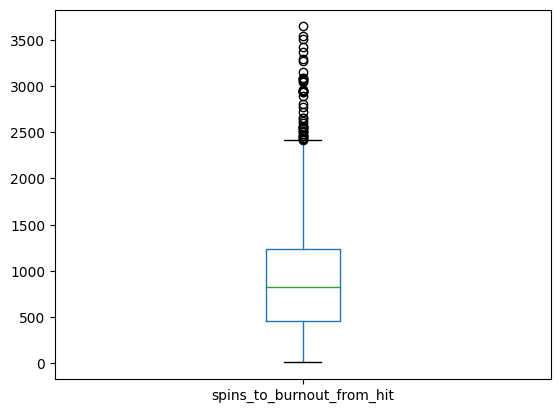

In [5]:
df_hits_tracker['spins_to_burnout_from_hit'].plot(kind='box')

In [6]:
df_features[df_features['week_dt'] == df_features['week_dt_at_burnout']][['mediabase_id', 'call_letters', 'weeks_since_hit']].drop_duplicates()

,mediabase_id,call_letters,weeks_since_hit
23,1086587,KHTS-FM,4.0
183,1086587,WHTZ-FM,7.0
514,2211649,KHKS-FM,1.0
795,2211649,WDCG-FM,10.0
1094,2211649,WHTZ-FM,13.0
...,...,...,...
654252,2831617,WIHT-FM,9.0
654338,2831617,WXKS-FM,12.0
654369,2831617,WXXL-FM,8.0
654390,2831617,WZFT-FM,13.0


#### prep training and test data

In [6]:
# define different types of feature columns
feature_cols = [col for col in df_features.columns if 'wk' in col]
feature_cols = list(set(feature_cols) - set([col for col in feature_cols if '1wk' in col]))
pop_cols = [col for col in feature_cols if 'pop' in col or 'ddl' in col or 'fav' in col]
spins_cols = [col for col in feature_cols if 'spins' in col]
propn_cols = [col for col in feature_cols if 'propn' in col]
streams_cols = [col for col in feature_cols if 'unv' in col]

In [37]:
feature_cols

['med_stream_count_prior_unv_prior_26wk_std',
 'artist_format_pop_prior_4wk_max',
 'artist_format_fav_prior_13wk_max',
 'song_format_spins_non_on_prior_4wk_min',
 'song_station_pop_prior_8wk_min',
 'med_completed_count_prior_unv_prior_4wk_max_pct_chg',
 'song_market_spins_total_prior_13wk_mean_pct_chg',
 'song_station_ddl_prior_13wk_min',
 'mean_thumbs_up_rate_prior_unv_prior_26wk_mean_pct_chg',
 'song_station_pop_prior_13wk_mean_pct_chg',
 'med_thumbs_up_rate_prior_unv_prior_8wk_min_pct_chg',
 'mean_completed_rate_prior_unv_prior_4wk_min',
 'min_stream_count_prior_unv_prior_8wk_min_pct_chg',
 'song_station_spins_am_pm_dr_prior_13wk_min_pct_chg',
 'max_completed_rate_prior_unv_prior_13wk_max_pct_chg',
 'max_completed_count_prior_unv_prior_13wk_mean_pct_chg',
 'count_song_format_pop_prior_13wk_std',
 'count_artist_format_pop_prior_26wk_max',
 'artist_format_pop_prior_8wk_std',
 'min_stream_count_prior_unv_prior_13wk_max',
 'artist_station_spins_total_prior_26wk_min_pct_chg',
 'min_strea

In [21]:
len([col for col in feature_cols if 'chg' in col])

612

#### quick detour to create spins to burn from hit bucket

In [19]:
df_features.loc[df_features['spins_to_burnout_from_hit'] > 2500, 'spins_to_burnout_from_hit'] = 2500

In [20]:
df_features['spins_to_burnout_curr'] = df_features['cuml_song_station_spins_non_on_at_burnout'].fillna(df_features['cuml_song_station_spins_non_on_at_hit'] + 2500) - df_features['cuml_song_station_spins_non_on']

In [21]:
df_features['hit_spins_bucket_curr'] = pd.cut(df_features['cuml_song_station_spins_non_on_at_hit'], bins=[0, 200, 500, round(np.max(df_hits_tracker['cuml_song_station_spins_non_on_at_hit'])/100)*100], labels=['early', 'mid', 'late'])

In [25]:
df_features[['mediabase_id', 'call_letters', 'hit_spins_bucket_curr', 'spins_to_burnout_from_hit']].drop_duplicates()

,mediabase_id,call_letters,hit_spins_bucket_curr,spins_to_burnout_from_hit
0,1086587,KHTS-FM,late,193.0
42,1086587,KIIS-FM,early,NaN
84,1086587,KYLD-FM,mid,NaN
127,1086587,KZZP-FM,late,NaN
169,1086587,WHTZ-FM,mid,381.0
...,...,...,...,...
655418,2865765,WKST-FM,late,NaN
655431,2865765,WWPW-FM,late,NaN
655444,2865765,WXKS-FM,mid,NaN
655457,2865765,WXXL-FM,late,NaN


In [26]:
df_features[['mediabase_id', 'call_letters', 'week_dt', 'weeks_since_hit', 'spins_to_burnout_from_hit',
                 'cuml_song_station_spins_non_on_at_burnout', 'cuml_song_station_spins_non_on',
                 'cuml_song_station_spins_non_on_at_hit',
                 'spins_to_burnout_curr']]

,mediabase_id,call_letters,week_dt,weeks_since_hit,spins_to_burnout_from_hit,cuml_song_station_spins_non_on_at_burnout,cuml_song_station_spins_non_on,cuml_song_station_spins_non_on_at_hit,spins_to_burnout_curr
0,1086587,KHTS-FM,2022-06-12,-19.0,193.0,1182.0,11,989.0,1171.0
1,1086587,KHTS-FM,2022-06-19,-18.0,193.0,1182.0,27,989.0,1155.0
2,1086587,KHTS-FM,2022-06-26,-17.0,193.0,1182.0,46,989.0,1136.0
3,1086587,KHTS-FM,2022-07-03,-16.0,193.0,1182.0,77,989.0,1105.0
4,1086587,KHTS-FM,2022-07-10,-15.0,193.0,1182.0,114,989.0,1068.0
...,...,...,...,...,...,...,...,...,...
655478,2865765,WZFT-FM,2023-02-26,3.0,NaN,NaN,500,253.0,2253.0
655479,2865765,WZFT-FM,2023-03-05,4.0,NaN,NaN,597,253.0,2156.0
655480,2865765,WZFT-FM,2023-03-12,5.0,NaN,NaN,688,253.0,2065.0
655481,2865765,WZFT-FM,2023-03-19,6.0,NaN,NaN,782,253.0,1971.0


##### train-test split and setup

In [22]:
# Extract max spins for songs turned hit in 2020/2021/2022
df_max_spins = df_features.groupby(['mediabase_id', 'call_letters', 'hit_tag_date', 'hit_tag_year']).agg(
    {'cuml_song_station_spins_non_on_at_hit': np.mean,
     'cuml_song_station_spins_non_on_at_burnout': np.mean, 'cuml_song_station_spins_non_on': np.max})

mask_all = (df_max_spins.index.get_level_values(3) >= 2020) & (df_max_spins.index.get_level_values(3) <= 2022) & (
        ((pd.isna(df_max_spins['cuml_song_station_spins_non_on_at_burnout'])) & (
                df_max_spins['cuml_song_station_spins_non_on'] >= df_max_spins[
            'cuml_song_station_spins_non_on_at_hit'] + 2500)) | (~pd.isna('cuml_song_station_spins_non_on_at_burnout')))

df_join = df_features.join(df_max_spins.loc[mask_all].droplevel(['hit_tag_date', 'hit_tag_year']),
                               on=['mediabase_id', 'call_letters'], rsuffix='_r', how='inner')

In [29]:
df_join.head()

,mediabase_id,song_id,call_letters,market_name,artist_id,format_code,song_release_date,first_callout_date,last_callout_date,first_spin_date,...,artist_format_fav_prior_26wk_mean_pct_chg,artist_format_spins_total_prior_8wk_max_pct_chg,mr_stream_count_prior_unv_prior_26wk_max_pct_chg,spins_to_burnout_curr,hit_spins_bucket_curr,first_spin_year,hit_tag_year,cuml_song_station_spins_non_on_at_hit_r,cuml_song_station_spins_non_on_at_burnout_r,cuml_song_station_spins_non_on_r
0,1086587,90090779,KHTS-FM,San Diego,26365333,H1,2022-06-01,2022-07-18,2023-01-02,2022-06-12,...,0.000000,0.000000,0.000000,1171.0,late,2022,2022,989.0,1182.0,1274
1,1086587,90090779,KHTS-FM,San Diego,26365333,H1,2022-06-01,2022-07-18,2023-01-02,2022-06-12,...,0.000000,0.000000,0.000000,1155.0,late,2022,2022,989.0,1182.0,1274
2,1086587,90090779,KHTS-FM,San Diego,26365333,H1,2022-06-01,2022-07-18,2023-01-02,2022-06-12,...,-0.066667,2.087284,0.061255,1136.0,late,2022,2022,989.0,1182.0,1274
3,1086587,90090779,KHTS-FM,San Diego,26365333,H1,2022-06-01,2022-07-18,2023-01-02,2022-06-12,...,0.000000,0.546917,0.000000,1105.0,late,2022,2022,989.0,1182.0,1274
4,1086587,90090779,KHTS-FM,San Diego,26365333,H1,2022-06-01,2022-07-18,2023-01-02,2022-06-12,...,-0.035714,0.281550,0.823342,1068.0,late,2022,2022,989.0,1182.0,1274


In [23]:
# Extract data for train test split
mask_wks = (df_join['weeks_since_hit'] > 0) & (
        df_join['week_dt'] <= df_join['week_dt_at_burnout'].fillna(
    df_join['week_dt']))
#target_cols = ['spins_to_burnout_from_hit_bucket']
target_cols = ['censoring_flg', 'spins_to_burnout_curr']
id_cols = ['mediabase_id', 'call_letters', 'weeks_since_hit', 'hit_tag_year']
cat_cols = ['market_name', 'hit_spins_bucket']
stratify_cols = ['censoring_flg']
df_all_prep = df_join.loc[mask_wks, id_cols + target_cols + feature_cols + cat_cols]
df_all_prep = df_all_prep[~pd.isna(df_all_prep['hit_spins_bucket'])]
df_all_prep.set_index(id_cols, inplace=True)

In [31]:
df_all_prep.head()

censoring_flg  \
mediabase_id call_letters weeks_since_hit hit_tag_year                  
1086587      KHTS-FM      1.0             2022                   True   
                          2.0             2022                   True   
                          3.0             2022                   True   
                          4.0             2022                   True   
             KIIS-FM      1.0             2022                  False   

                                                        spins_to_burnout_curr  \
mediabase_id call_letters weeks_since_hit hit_tag_year                          
1086587      KHTS-FM      1.0             2022                          146.0   
                          2.0             2022                           96.0   
                          3.0             2022                           45.0   
                          4.0             2022                            0.0   
             KIIS-FM      1.0             2022                         2420.0   

                                                        med_stream_count_prior_unv_prior_26wk_std  \
mediabase_id call_letters weeks_since_hit hit_tag_year                                              
1086587      KHTS-FM      1.0             2022                                        4574.827292   
                          2.0             2022                                        4643.188757   
                          3.0             2022                                        4688.729356   
                          4.0             2022                                        4832.902490   
             KIIS-FM      1.0             2022                                         359.965924   

                                                        artist_format_pop_prior_4wk_max  \
mediabase_id call_letters weeks_since_hit hit_tag_year                                    
1086587      KHTS-FM      1.0             2022                                     82.0   
                          2.0             2022                                     82.0   
                          3.0             2022                                     82.0   
                          4.0             2022                                     82.0   
             KIIS-FM      1.0             2022                                     84.0   

                                                        artist_format_fav_prior_13wk_max  \
mediabase_id call_letters weeks_since_hit hit_tag_year                                     
1086587      KHTS-FM      1.0             2022                                      30.0   
                          2.0             2022                                      30.0   
                          3.0             2022                                      30.0   
                          4.0             2022                                      29.0   
             KIIS-FM      1.0             2022                                      30.0   

                                                        song_format_spins_non_on_prior_4wk_min  \
mediabase_id call_letters weeks_since_hit hit_tag_year                                           
1086587      KHTS-FM      1.0             2022                                          2070.0   
                          2.0             2022                                          1994.0   
                          3.0             2022                                          1618.0   
                          4.0             2022                                           745.0   
             KIIS-FM      1.0             2022                                          4564.0   

                                                        song_station_pop_prior_8wk_min  \
mediabase_id call_letters weeks_since_hit hit_tag_year                                   
1086587      KHTS-FM      1.0             2022                                    82.0   
                          2.

In [40]:
df_all_prep

censoring_flg  \
mediabase_id call_letters weeks_since_hit hit_tag_year                  
1086587      KHTS-FM      1.0             2022                   True   
                          2.0             2022                   True   
                          3.0             2022                   True   
                          4.0             2022                   True   
             KIIS-FM      1.0             2022                  False   
...                                                               ...   
2848773      WHTZ-FM      12.0            2022                  False   
                          13.0            2022                  False   
                          14.0            2022                  False   
                          15.0            2022                  False   
                          16.0            2022                  False   

                                                        spins_to_burnout_curr  \
mediabase_id call_letters weeks_since_hit hit_tag_year                          
1086587      KHTS-FM      1.0             2022                          146.0   
                          2.0             2022                           96.0   
                          3.0             2022                           45.0   
                          4.0             2022                            0.0   
             KIIS-FM      1.0             2022                         2420.0   
...                                                                       ...   
2848773      WHTZ-FM      12.0            2022                         1785.0   
                          13.0            2022                         1744.0   
                          14.0            2022                         1706.0   
                          15.0            2022                         1665.0   
                          16.0            2022                         1626.0   

                                                        artist_format_ddl_prior_8wk_max  \
mediabase_id call_letters weeks_since_hit hit_tag_year                                    
1086587      KHTS-FM      1.0             2022                                     22.0   
                          2.0             2022                                     22.0   
                          3.0             2022                                     22.0   
                          4.0             2022                                     29.0   
             KIIS-FM      1.0             2022                                     14.0   
...                                                                                 ...   
2848773      WHTZ-FM      12.0            2022                                     14.0   
                          13.0            2022                                     14.0   
                          14.0            2022                                     15.0   
                          15.0            2022                                     15.0   
                          16.0            2022                                     15.0   

                                                        max_completed_count_prior_unv_prior_8wk_min  \
mediabase_id call_letters weeks_since_hit hit_tag_year                                                
1086587      KHTS-FM      1.0             2022                                              16038.0   
                          2.0             2022                                              16038.0   
                          3.0             2022                                              16038.0   
                          4.0             2022                                              16038.0   
             KIIS-FM      1.0             2022                                               8198.0   
...                                                                                             ...   
2848773      WHTZ-FM      12.0            20

In [34]:
df_all_prep.groupby(['hit_tag_year'])['market_name'].count()

hit_tag_year
2020    24453
2021    25619
2022     9676
Name: market_name, dtype: int64

In [24]:
week_start = 3
week_end = 52

weeks_range = list(range(week_start, week_end + 1))

In [25]:
from sklearn.model_selection import train_test_split
df_train_sets = pd.DataFrame()
df_test_sets = pd.DataFrame()
# training data & test data split
for wk in weeks_range:
    mask = (df_all_prep.index.get_level_values(2) == wk)
    df_train_prep, df_test_prep = train_test_split(df_all_prep.loc[mask], test_size=0.25, stratify=df_all_prep.loc[mask][stratify_cols], random_state=1000)
    df_train_sets = pd.concat([df_train_sets, df_train_prep])
    df_test_sets = pd.concat([df_test_sets, df_test_prep])

In [47]:
df_train_sets.groupby(['weeks_since_hit', 'censoring_flg'])[['spins_to_burnout_curr']].count(). join(df_test_sets.groupby(['weeks_since_hit', 'censoring_flg'])['spins_to_burnout_curr'].count(), rsuffix='_r')

spins_to_burnout_curr  spins_to_burnout_curr_r
weeks_since_hit censoring_flg                                                
3.0             False                            371                      124
                True                             707                      236
4.0             False                            371                      124
                True                             703                      234
5.0             False                            371                      124
...                                              ...                      ...
50.0            True                              30                       10
51.0            False                            256                       86
                True                              29                       10
52.0            False                            257                       85
                True                              28                       10

[100 rows x 2 columns]

In [26]:
# write train/test sets to a pickle file
df_train_sets.to_pickle('ebw_poc_training_sets_with_chg.pkl')
df_test_sets.to_pickle('ebw_poc_testing_sets_with_chg.pkl')

### model training

In [37]:
# train a simple regularized cox model
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sksurv.metrics import as_concordance_index_ipcw_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
split_number=5

param_grid = {
'estimator__l1_ratio': [0.5, 0.1, 0.01, 0.001]
}


best_estimators = {}
best_scores = {}

for wk in weeks_range:
    sv = CoxnetSurvivalAnalysis()
    X_train = df_train_prep[df_train_prep.index.get_level_values(2) == wk][feature_cols + cat_cols]
    print(X_train.shape)
    X_train = pd.get_dummies(X_train, columns=['market_name', 'hit_spins_bucket'])
    X_train[feature_cols] = StandardScaler().fit_transform(X_train[feature_cols])
    y_train = df_train_prep[df_train_prep.index.get_level_values(2) == wk][target_cols].to_records(index=False)

    sv_model = RandomizedSearchCV(estimator=as_concordance_index_ipcw_scorer(sv), param_distributions=param_grid, cv=split_number, verbose=1, n_iter=50, n_jobs=-1)
    sv_model.fit(X_train, y_train)
    best_estimators[wk] = sv_model.best_estimator_
    best_scores[wk] = sv_model.best_score_
    print(str(wk) + '_' + 'best_score: ' + f'{sv_model.best_score_}')

(0, 1494)


ValueError: Found array with 0 sample(s) (shape=(0, 1492)) while a minimum of 1 is required by StandardScaler.

In [38]:
df_train_prep

,,,,censoring_flg,spins_to_burnout_curr,med_thumbs_up_rate_prior_unv_prior_26wk_min,std_completed_rate_prior_unv_prior_13wk_mean,mr_stream_count_prior_unv_prior_8wk_min_pct_chg,med_stream_count_prior_unv_prior_8wk_min_pct_chg,mr_completed_rate_prior_unv_prior_26wk_mean,song_market_spins_total_prior_8wk_std,med_completed_rate_prior_unv_prior_8wk_mean_pct_chg,count_artist_format_pop_prior_8wk_mean,...,mr_thumbs_up_rate_prior_unv_prior_26wk_mean,mean_completed_rate_prior_unv_prior_4wk_min_pct_chg,mean_stream_count_prior_unv_prior_26wk_min,mean_thumbs_up_rate_prior_unv_prior_13wk_std,song_format_pop_prior_13wk_std,artist_spins_propn_prior_13wk_max,artist_spins_propn_prior_4wk_max,artist_station_spins_non_on_prior_13wk_max_pct_chg,market_name,hit_spins_bucket
mediabase_id,call_letters,weeks_since_hit,hit_tag_year,,,,,,,,,,,,,,,,,,,,,
2509968,WZFT-FM,52.0,2020,False,2130.0,0.839579,0.045331,0.0,-0.007402,0.650296,2.615203,-0.000233,17.125000,...,8.466209e-01,-0.000217,7.930448e+05,0.000656,4.041452,0.250000,0.205128,-0.123077,Baltimore,"(500.0, 750.0]"
2605093,WHTZ-FM,52.0,2021,True,0.0,0.000000,0.231015,0.0,0.000000,0.857143,11.585089,0.000000,12.375000,...,1.560656e-14,0.000000,1.172126e+05,0.002032,2.289634,1.000000,1.000000,0.000000,New York,"(250.0, 500.0]"
2638062,WKFS-FM,52.0,2021,False,2081.0,0.000000,0.231015,0.0,0.000000,0.857143,2.138090,0.000000,19.125000,...,1.560656e-14,0.000000,1.172126e+05,0.002032,0.000002,0.116667,0.000000,0.000000,Cincinnati,"(750.0, 1000.0]"
2569356,WWPW-FM,52.0,2020,False,1883.0,0.789879,0.042148,0.0,0.000000,0.576796,4.274091,0.001491,29.428571,...,8.136062e-01,0.000865,5.908916e+05,0.001079,5.637178,0.100000,0.100000,0.000000,Atlanta,"(1000.0, 1250.0]"
2625043,WKFS-FM,52.0,2021,False,339.0,0.000000,0.231015,0.0,0.000000,0.857143,30.912030,0.000000,7.000000,...,1.560656e-14,0.000000,1.172126e+05,0.002032,2.454718,1.000000,1.000000,0.000000,Cincinnati,"(1000.0, 1250.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638380,WHTZ-FM,52.0,2021,False,1820.0,0.000000,0.231015,0.0,0.000000,0.857143,0.925820,0.000000,1.200000,...,1.560656e-14,0.000000,1.172126e+05,0.002032,6.156298,1.000000,1.000000,0.000000,New York,"(250.0, 500.0]"
2687342,WWPW-FM,52.0,2021,False,2348.0,0.000000,0.231015,0.0,0.000000,0.857143,7.539183,0.000000,1.000000,...,1.560656e-14,0.000000,1.172126e+05,0.002032,5.269409,1.000000,1.000000,0.000000,Atlanta,"(500.0, 750.0]"
2653276,KKRZ-FM,52.0,2021,False,2133.0,0.000000,0.231015,0.0,0.000000,0.857143,2.121320,0.000000,13.428571,...,1.560656e-14,0.000000,1.172126e+05,0.002032,3.205897,0.000000,0.000000,-0.014493,"Portland, OR","(1000.0, 1250.0]"


In [36]:
train_sets[3]

,,,,censoring_flg,spins_to_burnout_curr,med_thumbs_up_rate_prior_unv_prior_26wk_min,std_completed_rate_prior_unv_prior_13wk_mean,mr_stream_count_prior_unv_prior_8wk_min_pct_chg,med_stream_count_prior_unv_prior_8wk_min_pct_chg,mr_completed_rate_prior_unv_prior_26wk_mean,song_market_spins_total_prior_8wk_std,med_completed_rate_prior_unv_prior_8wk_mean_pct_chg,count_artist_format_pop_prior_8wk_mean,...,mr_thumbs_up_rate_prior_unv_prior_26wk_mean,mean_completed_rate_prior_unv_prior_4wk_min_pct_chg,mean_stream_count_prior_unv_prior_26wk_min,mean_thumbs_up_rate_prior_unv_prior_13wk_std,song_format_pop_prior_13wk_std,artist_spins_propn_prior_13wk_max,artist_spins_propn_prior_4wk_max,artist_station_spins_non_on_prior_13wk_max_pct_chg,market_name,hit_spins_bucket
mediabase_id,call_letters,weeks_since_hit,hit_tag_year,,,,,,,,,,,,,,,,,,,,,
2552475,WHYI-FM,3.0,2020,True,2211.0,0.692000,0.024736,0.832223,0.617770,0.635440,18.761187,-0.003833,24.625000,...,7.509418e-01,-0.004089,1.629100e+04,0.020268,2.170509,1.000000,0.780702,0.022556,Miami,"(750.0, 1000.0]"
2531558,KKRZ-FM,3.0,2020,True,1.0,0.787325,0.019470,-0.007474,0.021194,0.632569,8.559665,-0.000957,7.125000,...,7.997083e-01,-0.000375,3.452318e+06,0.002238,3.881250,0.888889,0.888889,0.000000,"Portland, OR","(2000.0, 2250.0]"
2399249,KSLZ-FM,3.0,2020,True,113.0,0.827904,0.042740,0.000000,0.000000,0.681549,13.071233,0.001942,5.500000,...,8.180527e-01,0.001909,2.163425e+05,0.005400,3.521363,1.000000,1.000000,0.000000,St. Louis,"(750.0, 1000.0]"
2552475,KDHT-FM,3.0,2022,False,2456.0,0.792326,0.043996,-0.205901,0.000000,0.641464,6.902381,-0.000023,16.142857,...,7.988271e-01,0.000000,3.323907e+05,0.000540,5.656854,0.425532,0.211765,0.000000,Denver,"(250.0, 500.0]"
2691407,WHQC-FM,3.0,2022,False,2402.0,0.000000,0.231015,0.000000,0.000000,0.857143,31.684832,0.000000,16.750000,...,1.560656e-14,0.000000,1.172126e+05,0.002032,2.136376,0.882353,0.793103,-0.079365,Charlotte-Gastonia-Rock Hill,"(1250.0, 1500.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2524291,KSLZ-FM,3.0,2020,True,1473.0,0.813692,0.025419,0.000000,0.000000,0.598561,33.542084,0.001283,13.800000,...,8.529324e-01,0.002122,8.485711e+04,0.012410,4.255715,1.000000,1.000000,0.020833,St. Louis,"(500.0, 750.0]"
2654543,WHYI-FM,3.0,2021,False,2278.0,0.000000,0.231015,0.000000,0.000000,0.857143,43.021589,0.000000,6.125000,...,1.560656e-14,0.000000,1.172126e+05,0.002032,6.896673,1.000000,1.000000,0.000000,Miami,"(750.0, 1000.0]"
2727194,KHFI-FM,3.0,2022,True,1033.0,0.000000,0.231015,0.000000,0.000000,0.857143,33.911387,0.000000,12.000000,...,1.560656e-14,0.000000,1.172126e+05,0.002032,1.433369,1.000000,1.000000,0.000000,Austin,"(1250.0, 1500.0]"


In [ ]:
for wk in weeks_range:


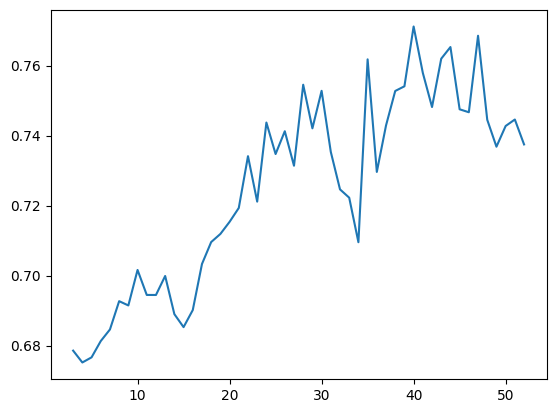

In [164]:
import matplotlib.pyplot as plt
plt.plot(best_scores.keys(), [best_scores[key] for key in best_scores.keys()])

In [165]:
# write to pickle file
import pickle
with open('best_est_coxsurvnet_h1.pkl', 'wb') as file:
    pickle.dump(best_estimators, file)
with open('best_scores_coxsurvnet_h1.pkl', 'wb') as file:
    pickle.dump(best_scores, file)

In [46]:
import pickle
with open('best_scores_coxsurvnet_h1.pkl', 'rb') as file:
    best_scores_cnet = pickle.load(file)

In [47]:
with open('best_est_coxsurvnet_h1.pkl', 'rb') as file:
    best_estimators_cnet = pickle.load(file)

#### GBM

In [74]:
feature_cols

['mr_stream_count_prior_unv_prior_8wk_min_pct_chg',
 'med_stream_count_prior_unv_prior_8wk_min_pct_chg',
 'med_completed_rate_prior_unv_prior_8wk_mean_pct_chg',
 'artist_spins_propn_prior_26wk_max_pct_chg',
 'artist_format_pop_prior_8wk_mean_pct_chg',
 'song_format_ddl_prior_26wk_mean_pct_chg',
 'artist_station_spins_total_prior_8wk_min_pct_chg',
 'min_completed_count_prior_unv_prior_13wk_max_pct_chg',
 'max_stream_count_prior_unv_prior_4wk_max_pct_chg',
 'song_format_spins_total_prior_4wk_max_pct_chg',
 'max_stream_count_prior_unv_prior_26wk_min_pct_chg',
 'mean_stream_count_prior_unv_prior_13wk_mean_pct_chg',
 'artist_station_spins_am_pm_dr_prior_8wk_mean_pct_chg',
 'max_completed_rate_prior_unv_prior_4wk_mean_pct_chg',
 'min_completed_count_prior_unv_prior_26wk_max_pct_chg',
 'song_station_spins_non_on_prior_8wk_min_pct_chg',
 'max_thumbs_up_rate_prior_unv_prior_8wk_max_pct_chg',
 'artist_station_spins_non_on_prior_26wk_mean_pct_chg',
 'artist_station_spins_non_on_prior_26wk_max_pct

In [73]:
feature_cols = [col for col in feature_cols if ('chg' in col) or ('ddl' in col)]

In [14]:
week_start = 3
week_end = 52

weeks_range = list(range(week_start, week_end + 1))
best_estimators = {}
best_scores = {}

In [75]:
# train a gbm
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.metrics import as_concordance_index_ipcw_scorer
from sklearn.model_selection import RandomizedSearchCV
split_number=5
split_number=2

param_grid = {
    'estimator__max_depth': [2, 4, 6, 8, 10],
    'estimator__max_features': ['auto', 'sqrt'],
    'estimator__n_estimators': [50, 100, 150, 200],
    'estimator__learning_rate': [0.01, 0.001, 0.5, 0.1]
}

week_start = 3
week_end = 52

weeks_range = list(range(week_start, week_end + 1))
best_estimators = {}
best_scores = {}

for wk in weeks_range:
    sv = GradientBoostingSurvivalAnalysis()
    X_train = df_train_sets[df_train_sets.index.get_level_values(2) == wk][feature_cols + cat_cols]
    # X_train = df_train_prep[df_train_prep.index.get_level_values(2) == wk][feature_cols + cat_cols]
    X_train = pd.get_dummies(X_train, columns=['market_name', 'hit_spins_bucket'])
    # X_train[feature_cols] = StandardScaler().fit_transform(X_train[feature_cols])
    y_train = df_train_sets[df_train_sets.index.get_level_values(2) == wk][target_cols].to_records(index=False)

    sv_model = RandomizedSearchCV(estimator=as_concordance_index_ipcw_scorer(sv), param_distributions=param_grid, cv=split_number, verbose=1, n_iter=50, n_jobs=-1)
    sv_model.fit(X_train, y_train)
    best_estimators[wk] = sv_model.best_estimator_
    best_scores[wk] = sv_model.best_score_
    print(str(wk) + '_' + 'best_score: ' + f'{sv_model.best_score_}')

Fitting 2 folds for each of 50 candidates, totalling 100 fits
3_best_score: 0.7021062184188964
Fitting 2 folds for each of 50 candidates, totalling 100 fits
4_best_score: 0.7038930868311772
Fitting 2 folds for each of 50 candidates, totalling 100 fits
5_best_score: 0.7192272054624533
Fitting 2 folds for each of 50 candidates, totalling 100 fits
6_best_score: 0.7241400742692239
Fitting 2 folds for each of 50 candidates, totalling 100 fits
7_best_score: 0.7110432907796654
Fitting 2 folds for each of 50 candidates, totalling 100 fits
8_best_score: 0.715250461428656
Fitting 2 folds for each of 50 candidates, totalling 100 fits
9_best_score: 0.729469510688122
Fitting 2 folds for each of 50 candidates, totalling 100 fits
10_best_score: 0.7277446518678944
Fitting 2 folds for each of 50 candidates, totalling 100 fits
11_best_score: 0.722135728459474
Fitting 2 folds for each of 50 candidates, totalling 100 fits
12_best_score: 0.7146846451566734
Fitting 2 folds for each of 50 candidates, totalli

In [42]:
X_train.loc[:, X_train.isna().any()]

,,,,artist_station_spins_total_prior_8wk_min_pct_chg,min_completed_count_prior_unv_prior_13wk_max_pct_chg,artist_station_spins_am_pm_dr_prior_8wk_mean_pct_chg,min_completed_count_prior_unv_prior_26wk_max_pct_chg,song_station_spins_non_on_prior_8wk_min_pct_chg,med_thumbs_up_rate_prior_unv_prior_4wk_min_pct_chg,song_format_spins_non_on_prior_26wk_min_pct_chg,artist_spins_propn_prior_26wk_min_pct_chg,song_market_spins_non_on_prior_26wk_min_pct_chg,artist_market_spins_total_prior_13wk_min_pct_chg,...,mr_thumbs_up_rate_prior_unv_prior_26wk_mean_pct_chg,min_completed_rate_prior_unv_prior_26wk_max_pct_chg,med_thumbs_up_rate_prior_unv_prior_8wk_max_pct_chg,med_thumbs_up_rate_prior_unv_prior_13wk_mean_pct_chg,song_market_spins_total_prior_13wk_min_pct_chg,market_spins_propn_prior_8wk_min_pct_chg,min_completed_count_prior_unv_prior_26wk_min_pct_chg,min_thumbs_up_rate_prior_unv_prior_13wk_mean_pct_chg,song_station_spins_am_pm_dr_prior_4wk_min_pct_chg,artist_station_spins_non_on_prior_13wk_max_pct_chg
mediabase_id,call_letters,weeks_since_hit,hit_tag_year,,,,,,,,,,,,,,,,,,,,,
2552475,WHYI-FM,3.0,2020,0.232143,0.0,0.064356,0.0,0.208333,0.005333,0.000000,0.000000,0.0,0.000000,...,0.003977,0.0,0.001133,0.005301,0.000000,0.000000,0.0,-0.005428,0.000000,0.022556
2531558,KKRZ-FM,3.0,2020,-0.071429,0.0,-0.144828,0.0,0.000000,0.000173,0.000000,0.000000,0.0,0.000000,...,0.001232,0.0,0.001162,0.000546,0.000000,-0.035714,0.0,0.000000,0.000000,0.000000
2399249,KSLZ-FM,3.0,2020,0.000000,0.0,-0.011905,0.0,0.000000,0.000000,0.000000,0.000000,0.0,-0.093750,...,-0.000020,0.0,-0.016520,-0.000669,-0.022222,0.000000,0.0,0.000000,0.000000,0.000000
2552475,KDHT-FM,3.0,2022,0.000000,0.0,0.038549,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000552,0.0,0.000121,0.000090,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2691407,WHQC-FM,3.0,2022,0.000000,NaN,0.121212,NaN,0.000000,NaN,-0.079258,0.000000,0.0,0.000000,...,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.333333,-0.079365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2524291,KSLZ-FM,3.0,2020,0.000000,0.0,0.076923,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.560000,...,0.000966,0.0,0.000000,0.004617,0.560000,0.000000,0.0,0.000000,0.026316,0.020833
2654543,WHYI-FM,3.0,2021,0.000000,NaN,0.004717,NaN,0.000000,NaN,0.000000,-0.026667,0.0,0.000000,...,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.018519,0.000000
2727194,KHFI-FM,3.0,2022,0.723077,NaN,0.081466,NaN,1.153846,NaN,0.401636,0.000000,0.0,0.000000,...,0.000000,NaN,NaN,NaN,0.000000,0.559682,NaN,0.000000,-0.014706,0.000000


In [44]:
X_train.loc[((X_train.index.get_level_values(0) == 2345185) & (X_train.index.get_level_values(1) == 'WNCI-FM')), X_train.isna().any()]

,,,,artist_station_spins_total_prior_8wk_min_pct_chg,min_completed_count_prior_unv_prior_13wk_max_pct_chg,artist_station_spins_am_pm_dr_prior_8wk_mean_pct_chg,min_completed_count_prior_unv_prior_26wk_max_pct_chg,song_station_spins_non_on_prior_8wk_min_pct_chg,med_thumbs_up_rate_prior_unv_prior_4wk_min_pct_chg,song_format_spins_non_on_prior_26wk_min_pct_chg,artist_spins_propn_prior_26wk_min_pct_chg,song_market_spins_non_on_prior_26wk_min_pct_chg,artist_market_spins_total_prior_13wk_min_pct_chg,...,mr_thumbs_up_rate_prior_unv_prior_26wk_mean_pct_chg,min_completed_rate_prior_unv_prior_26wk_max_pct_chg,med_thumbs_up_rate_prior_unv_prior_8wk_max_pct_chg,med_thumbs_up_rate_prior_unv_prior_13wk_mean_pct_chg,song_market_spins_total_prior_13wk_min_pct_chg,market_spins_propn_prior_8wk_min_pct_chg,min_completed_count_prior_unv_prior_26wk_min_pct_chg,min_thumbs_up_rate_prior_unv_prior_13wk_mean_pct_chg,song_station_spins_am_pm_dr_prior_4wk_min_pct_chg,artist_station_spins_non_on_prior_13wk_max_pct_chg
mediabase_id,call_letters,weeks_since_hit,hit_tag_year,,,,,,,,,,,,,,,,,,,,,
2345185,WNCI-FM,3.0,2022,NaN,0.0,0.166667,0.0,NaN,-0.000133,0.0,0.0,NaN,NaN,...,-0.002745,0.0,-0.000164,-0.000257,NaN,0.0,0.0,NaN,NaN,0.25


In [48]:
df_all_prep.loc[((df_all_prep.index.get_level_values(0) == 2345185) & (df_all_prep.index.get_level_values(1) == 'WNCI-FM')), ['artist_station_spins_total_prior_8wk_min', 'artist_station_spins_total_prior_8wk_min_pct_chg']]

artist_station_spins_total_prior_8wk_min  \
mediabase_id call_letters weeks_since_hit hit_tag_year                                             
2345185      WNCI-FM      1.0             2022                                               0.0   
                          2.0             2022                                               0.0   
                          3.0             2022                                               0.0   
                          4.0             2022                                               0.0   
                          5.0             2022                                               0.0   
                          6.0             2022                                               0.0   
                          7.0             2022                                               1.0   
                          8.0             2022                                               1.0   
                          9.0             2022                                               1.0   
                          10.0            2022                                               1.0   
                          11.0            2022                                               0.0   
                          12.0            2022                                               0.0   
                          13.0            2022                                               0.0   
                          14.0            2022                                               0.0   
                          15.0            2022                                               0.0   
                          16.0            2022                                               0.0   
                          17.0            2022                                               0.0   
                          18.0            2022                                               0.0   
                          19.0            2022                                               0.0   
                          20.0            2022                                               0.0   
                          21.0            2022                                               0.0   
                          22.0            2022                                               0.0   
                          23.0            2022                                               0.0   
                          24.0            2022                                               0.0   
                          25.0            2022                                               0.0   
                          26.0            2022                                               0.0   
                          27.0            2022                                               0.0   
                          28.0            2022                                               0.0   
                          29.0            2022                                               0.0   
                          30.0            2022                                               0.0   
                          31.0            2022                                               0.0   
                          32.0            2022                                               0.0   
                          33.0            2022                                               0.0   
                          34.0            2022                                               0.0   
                          35.0            2022                                               0.0   
                          36.0            2022                                               0.0   
                          37.0            2022                                               0.0   
                          38.0            2022                                               0.0   
                          39.0            2022          

In [85]:
train_sets[wk][target_cols]

,,,censoring_flg,spins_to_burnout_curr
mediabase_id,call_letters,weeks_since_hit,,
2722189,KKRZ-FM,4.0,False,2307.0
2398331,WXXL-FM,4.0,False,2342.0
2582475,WKSC-FM,4.0,True,1283.0
2716380,WRVW-FM,4.0,False,2145.0
2722189,WRVW-FM,4.0,False,2448.0
...,...,...,...,...
2576232,WZFT-FM,4.0,False,2262.0
2794968,WIHT-FM,4.0,True,552.0
2591406,WFLZ-FM,4.0,True,610.0


In [16]:
X_train = train_sets[4][feature_cols + cat_cols]

X_train.columns[X_train.isna().any()].tolist()

['hit_spins_bucket']

In [20]:
df_features.set_index(id_cols).loc[X_train[pd.isna(X_train['hit_spins_bucket'])].index]['cuml_song_station_spins_non_on_at_hit']

mediabase_id  call_letters  weeks_since_hit
2739037       WXKS-FM       4.0                   NaN
2582475       WWPW-FM       4.0                3826.0
Name: cuml_song_station_spins_non_on_at_hit, dtype: float64

In [21]:
df_hits_tracker[(df_hits_tracker['mediabase_id'] == 2739037) & (df_hits_tracker['call_letters'] == 'WXKS-FM')]

,mediabase_id,call_letters,song_release_date,song_release_year,ftq_date,hit_tag_date,ddl_over_thresh_dt_first,ddl_over_thresh_dt_second,weeks_bw_ftq_first_spins,weeks_bw_top_quintiles,cuml_song_station_spins_non_on_at_ftq,cuml_song_station_spins_non_on_at_hit,cuml_song_station_spins_non_on_at_pre_burnout,cuml_song_station_spins_non_on_at_burnout,spins_to_hit_from_ftq,spins_to_burnout_from_hit,censoring_flg
641275,2739037,WXKS-FM,2021-09-01,2021.0,2022-02-27,2022-03-13,None,None,-3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,False


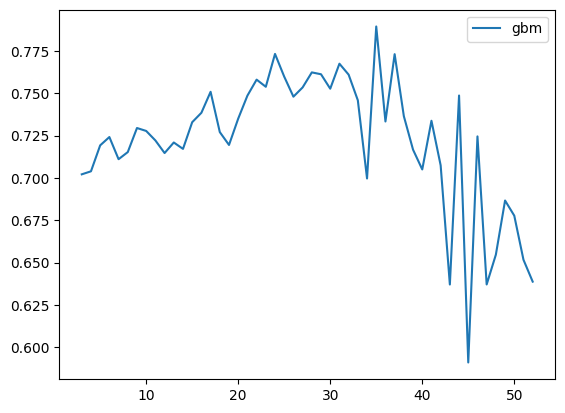

In [76]:
import matplotlib.pyplot as plt
plt.plot(best_scores.keys(), [best_scores[key] for key in best_scores.keys()], label='gbm')
# plt.plot(best_scores_cnet.keys(), [best_scores_cnet[key] for key in best_scores_cnet.keys()], label='elastic-net')
plt.legend()

In [81]:
# write results to pickle file
with open('best_est_gbm_with_chg_h1.pkl', 'wb') as file:
    pickle.dump(best_estimators, file)
with open('best_scores_gbm_with_chg_h1.pkl', 'wb') as file:
    pickle.dump(best_scores, file)

In [10]:
import pickle

In [27]:
with open('best_scores_gbm_with_chg_h1.pkl', 'rb') as file:
    best_scores_gbm = pickle.load(file)

In [28]:
with open('best_est_gbm_with_chg_h1.pkl', 'rb') as file:
    best_estimators_gbm = pickle.load(file)

In [29]:
scores_test = {}
preds_test = {}
for wk in weeks_range:
    X_test = df_test_sets[df_test_sets.index.get_level_values(2) == wk][feature_cols + cat_cols]
    # X_train = df_train_prep[df_train_prep.index.get_level_values(2) == wk][feature_cols + cat_cols]
    X_test = pd.get_dummies(X_test, columns=['market_name', 'hit_spins_bucket'])
    missing_cols = list(set(best_estimators_gbm[wk].estimator.feature_names_in_) - set(X_test.columns))
    print(missing_cols)
    for col in missing_cols:
        X_test[col] = 0
    # X_train[feature_cols] = StandardScaler().fit_transform(X_train[feature_cols])
    y_test = df_test_sets[df_test_sets.index.get_level_values(2) == wk][target_cols].to_records(index=False)

    scores_test[wk] = best_estimators_gbm[wk].score(X_test[best_estimators_gbm[wk].estimator.feature_names_in_], y_test)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['market_name_Denver']
[]
[]
[]
[]
[]
[]
['market_name_Denver']
[]
[]
[]
[]
['market_name_Denver']
[]
[]
[]
[]
[]
['market_name_Dallas']
['market_name_Dallas']
['market_name_Chicago', 'market_name_Dallas']
['market_name_Minneapolis']
['market_name_Chicago', 'market_name_Minneapolis']
['market_name_Raleigh']
['market_name_Denver']
['market_name_Denver', 'market_name_Raleigh']
['market_name_Pittsburgh', 'market_name_Denver']
['market_name_Denver', 'market_name_Salt Lake City']
[]
[]
[]
[]


In [30]:
scores_test

{3: 0.7410750317172661,
 4: 0.7057593236442946,
 5: 0.7182607712740905,
 6: 0.7367110303959398,
 7: 0.7360469959275971,
 8: 0.7134869065514003,
 9: 0.7317136282117506,
 10: 0.7215890439370215,
 11: 0.7364494499170448,
 12: 0.7561603680949606,
 13: 0.7514448109663779,
 14: 0.7431953878908497,
 15: 0.7171127315798294,
 16: 0.7311521908632466,
 17: 0.7648982030611906,
 18: 0.75602343242615,
 19: 0.7721569132734415,
 20: 0.7517018807125185,
 21: 0.71737460764459,
 22: 0.7717221291531624,
 23: 0.7891467369171032,
 24: 0.7672813406404002,
 25: 0.781028734311454,
 26: 0.8161039678691352,
 27: 0.7769492031310863,
 28: 0.747179070160676,
 29: 0.8015371982874177,
 30: 0.7487421101360395,
 31: 0.7759392241168196,
 32: 0.7434009194248572,
 33: 0.7679563549250813,
 34: 0.7324343585419473,
 35: 0.7882450165393627,
 36: 0.7549912990953112,
 37: 0.7545648973702018,
 38: 0.730781625032502,
 39: 0.744669220725881,
 40: 0.7478068472787741,
 41: 0.8066418364199702,
 42: 0.7266380707978211,
 43: 0.77970699

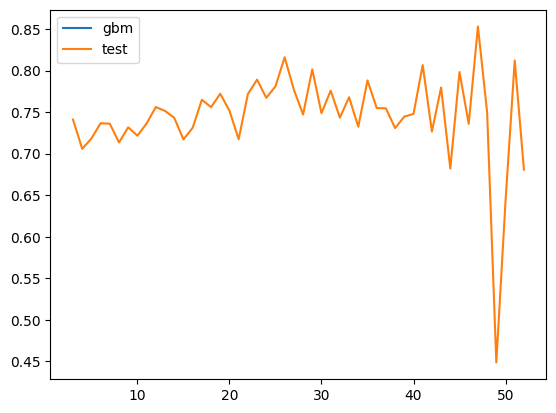

In [31]:
import matplotlib.pyplot as plt

plt.plot(best_scores.keys(), [best_scores[key] for key in best_scores.keys()], label='gbm')
plt.plot(scores_test.keys(), [scores_test[key] for key in scores_test.keys()], label='test')
plt.legend()

#### Variable Importance

In [35]:
from shap import Explainer
explainers = {}
shaps = {}
test_scores_gbm = {}
for wk in [26]:
    X_train = df_test_sets[df_test_sets.index.get_level_values(2) == wk][feature_cols + cat_cols]
    # X_train = df_train_prep[df_train_prep.index.get_level_values(2) == wk][feature_cols + cat_cols]
    X_train = pd.get_dummies(X_train, columns=['market_name', 'hit_spins_bucket'])
    # X_train[feature_cols] = StandardScaler().fit_transform(X_train[feature_cols])
    y_train = df_test_sets[df_test_sets.index.get_level_values(2) == wk][target_cols].to_records(index=False)

    # X_test = test_sets[wk][feature_cols + cat_cols]
    # X_test = pd.get_dummies(X_test, columns=['market_name', 'hit_spins_bucket'])
    # y_test = test_sets[wk][target_cols].to_records(index=False)
    #
    sv = best_estimators_gbm[wk]
    #
    # print(wk)
    # test_scores_gbm[wk] = sv.score(X_test[X_train.columns], y_test)
    feature_names = sv.estimator.feature_names_in_
    # print(feature_names)
    if wk == 26:
        explainers[wk] = Explainer(sv.predict, X_train[feature_names], feature_names=feature_names, max_evals=5000)
        shaps[wk] = explainers[wk](X_train[feature_names])

Permutation explainer: 169it [08:08,  2.94s/it]                         


In [36]:
feature_names

array(['mr_stream_count_prior_unv_prior_8wk_min_pct_chg',
       'med_stream_count_prior_unv_prior_8wk_min_pct_chg',
       'med_completed_rate_prior_unv_prior_8wk_mean_pct_chg',
       'artist_spins_propn_prior_26wk_max_pct_chg',
       'artist_format_pop_prior_8wk_mean_pct_chg',
       'song_format_ddl_prior_26wk_mean_pct_chg',
       'artist_station_spins_total_prior_8wk_min_pct_chg',
       'min_completed_count_prior_unv_prior_13wk_max_pct_chg',
       'max_stream_count_prior_unv_prior_4wk_max_pct_chg',
       'song_format_spins_total_prior_4wk_max_pct_chg',
       'max_stream_count_prior_unv_prior_26wk_min_pct_chg',
       'mean_stream_count_prior_unv_prior_13wk_mean_pct_chg',
       'artist_station_spins_am_pm_dr_prior_8wk_mean_pct_chg',
       'max_completed_rate_prior_unv_prior_4wk_mean_pct_chg',
       'min_completed_count_prior_unv_prior_26wk_max_pct_chg',
       'song_station_spins_non_on_prior_8wk_min_pct_chg',
       'max_thumbs_up_rate_prior_unv_prior_8wk_max_pct_chg',
  

In [33]:
X_train

,,,,song_station_spins_total_prior_8wk_max,mr_completed_count_prior_unv_prior_4wk_min,artist_station_spins_am_pm_dr_prior_26wk_std,med_completed_count_prior_unv_prior_26wk_min_pct_chg,artist_market_spins_non_on_prior_4wk_std,artist_format_ddl_prior_13wk_min_pct_chg,song_format_spins_am_pm_dr_prior_4wk_min,artist_format_ddl_prior_26wk_max_pct_chg,song_station_spins_total_prior_8wk_std,std_stream_count_prior_unv_prior_4wk_max,...,"hit_spins_bucket_(1250.0, 1500.0]","hit_spins_bucket_(1500.0, 1750.0]","hit_spins_bucket_(1750.0, 2000.0]","hit_spins_bucket_(2000.0, 2250.0]","hit_spins_bucket_(2250.0, 2500.0]","hit_spins_bucket_(2500.0, 2750.0]","hit_spins_bucket_(2750.0, 3000.0]","hit_spins_bucket_(3000.0, 3250.0]","hit_spins_bucket_(3250.0, 3500.0]","hit_spins_bucket_(3500.0, 3750.0]"
mediabase_id,call_letters,weeks_since_hit,hit_tag_year,,,,,,,,,,,,,,,,,,,,,
2672451,WFLZ-FM,26.0,2021,4.0,6.0,45.386291,0.000000,9.464847,0.000000,851.0,0.0,1.603567,230592.641721,...,0,0,0,0,0,0,0,0,0,0
2524291,WDCG-FM,26.0,2020,120.0,4788.0,10.846410,0.063877,9.831921,0.000000,2641.0,0.0,7.045769,704074.493759,...,0,0,0,0,0,0,0,0,0,0
2638062,WHQC-FM,26.0,2021,5.0,6.0,13.542696,0.000000,4.031129,0.000000,206.0,0.0,2.000000,230592.641721,...,0,1,0,0,0,0,0,0,0,0
2591406,KZZP-FM,26.0,2021,18.0,6.0,9.100549,0.000000,13.250786,-0.090909,813.0,0.0,1.552648,230592.641721,...,1,0,0,0,0,0,0,0,0,0
2583267,WHTZ-FM,26.0,2020,50.0,462.0,20.520759,0.028367,35.805028,0.000000,1952.0,0.0,14.860662,282671.062136,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553815,KYLD-FM,26.0,2020,4.0,101610.0,8.107072,0.020748,1.414214,0.000000,496.0,0.0,1.457738,81691.746511,...,1,0,0,0,0,0,0,0,0,0
2430725,KDWB-FM,26.0,2020,1.0,254752.0,12.946577,0.000000,1.914854,0.000000,461.0,0.0,0.353553,802550.517267,...,0,0,0,0,0,0,0,0,0,0
2597601,WIHT-FM,26.0,2021,6.0,6.0,24.994923,0.000000,6.480741,0.000000,1412.0,0.0,1.581139,230592.641721,...,0,0,0,0,0,0,0,0,0,0


In [82]:
shaps

{26: .values =
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])
 
 .base_values =
 array([-0.03088085, -0.03088085, -0.03088085, -0.03088085, -0.03088085,
        -0.03088085, -0.03088085, -0.03088085, -0.03088085, -0.03088085,
        -0.03088085, -0.03088085, -0.03088085, -0.03088085, -0.03088085,
        -0.03088085, -0.03088085, -0.03088085, -0.03088085, -0.03088085,
        -0.03088085, -0.03088085, -0.03088085, -0.03088085, -0.03088085,
        -0.03088085, -0.03088085, -0.03088085, -0.03088085, -0.03088085,
        -0.03088085, -0.03088085, -0.03088085, -0.03088085, -0.03088085,
        -0.03088085, -0.03088085, -0.03088085, -0.03088085, -0.03088085,
        -0.03088085, -0.03088085, -0.03088085, -0.03088085, -0.03088085,
        -0.03088085, -0.03088085, -0.03088085, -0.03088085, -0

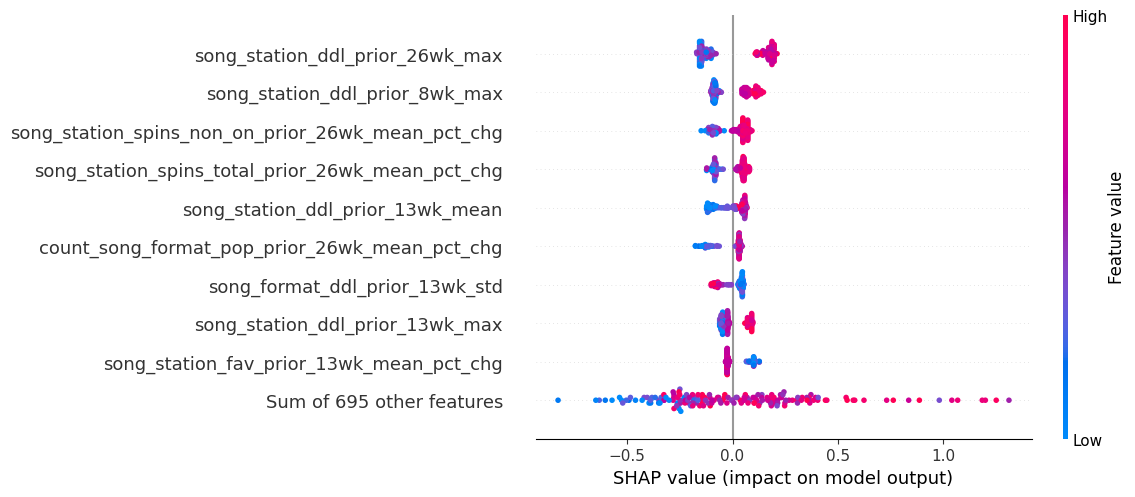

<Figure size 640x480 with 0 Axes>

In [124]:
from shap.plots import beeswarm
import shap
# ax = beeswarm(shaps[26], matplotlib=True, show=False)
fig = plt.figure()
beeswarm(shaps[26], order=shaps[26].abs.mean(0))
# shap.plots.bar(shaps[26].abs.mean(0))
f = plt.gcf()
plt.tight_layout()
plt.savefig('shap_value_plot.jpeg', format='jpeg', dpi=300)

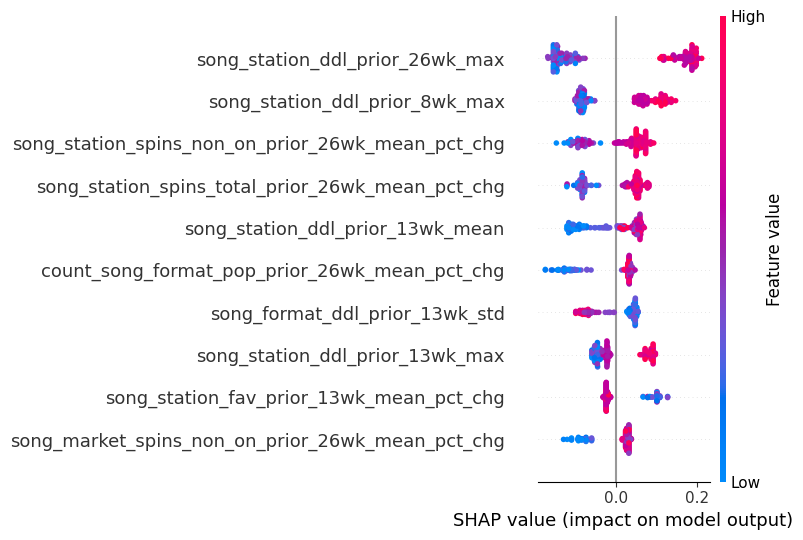

In [125]:
import shap
shap.summary_plot(shaps[26], show=False, max_display=10)
plt.tight_layout()
plt.savefig('shap_values_for_week_26.jpeg', format='jpeg', dpi=300)

In [38]:
df_test_sets[df_test_sets.index.get_level_values(2) == 26]

,,,,censoring_flg,spins_to_burnout_curr,song_station_spins_total_prior_8wk_max,mr_completed_count_prior_unv_prior_4wk_min,artist_station_spins_am_pm_dr_prior_26wk_std,med_completed_count_prior_unv_prior_26wk_min_pct_chg,artist_market_spins_non_on_prior_4wk_std,artist_format_ddl_prior_13wk_min_pct_chg,song_format_spins_am_pm_dr_prior_4wk_min,artist_format_ddl_prior_26wk_max_pct_chg,...,song_market_spins_total_prior_26wk_mean_pct_chg,mr_completed_count_prior_unv_prior_4wk_std,artist_station_spins_non_on_prior_4wk_min_pct_chg,max_completed_rate_prior_unv_prior_26wk_std,mean_thumbs_up_rate_prior_unv_prior_8wk_max,artist_format_ddl_prior_4wk_max_pct_chg,song_format_spins_total_prior_26wk_mean_pct_chg,artist_market_spins_non_on_prior_13wk_min_pct_chg,market_name,hit_spins_bucket
mediabase_id,call_letters,weeks_since_hit,hit_tag_year,,,,,,,,,,,,,,,,,,,,,
2672451,WFLZ-FM,26.0,2021,False,2471.0,4.0,6.0,45.386291,0.000000,9.464847,0.000000,851.0,0.0,...,-0.063492,0.000000,0.000000,0.000000e+00,0.237579,0.125000,-0.013182,0.000000,Tampa,"(750.0, 1000.0]"
2524291,WDCG-FM,26.0,2020,True,0.0,120.0,4788.0,10.846410,0.063877,9.831921,0.000000,2641.0,0.0,...,-0.013706,967.244325,0.000000,1.312084e-01,0.860851,0.000000,-0.053989,0.000000,Raleigh,"(750.0, 1000.0]"
2638062,WHQC-FM,26.0,2021,False,2439.0,5.0,6.0,13.542696,0.000000,4.031129,0.000000,206.0,0.0,...,-0.042453,0.000000,0.000000,0.000000e+00,0.237579,0.166667,-0.030582,0.000000,Charlotte-Gastonia-Rock Hill,"(1500.0, 1750.0]"
2591406,KZZP-FM,26.0,2021,False,2228.0,18.0,6.0,9.100549,0.000000,13.250786,-0.090909,813.0,0.0,...,-0.024390,0.000000,0.384615,0.000000e+00,0.237579,-0.153846,-0.023655,0.000000,Phoenix,"(1250.0, 1500.0]"
2583267,WHTZ-FM,26.0,2020,True,646.0,50.0,462.0,20.520759,0.028367,35.805028,0.000000,1952.0,0.0,...,-0.014077,27.928480,0.000000,1.189887e-01,0.760461,0.000000,-0.042924,0.000000,New York,"(500.0, 750.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553815,KYLD-FM,26.0,2020,False,2404.0,4.0,101610.0,8.107072,0.020748,1.414214,0.000000,496.0,0.0,...,-0.292365,3286.520196,0.000000,0.000000e+00,0.898947,0.000000,-0.161372,0.000000,San Francisco,"(1250.0, 1500.0]"
2430725,KDWB-FM,26.0,2020,False,2236.0,1.0,254752.0,12.946577,0.000000,1.914854,0.000000,461.0,0.0,...,-0.087393,61808.576742,0.000000,1.054605e-08,0.850260,0.000000,-0.007994,0.000000,Minneapolis,"(500.0, 750.0]"
2597601,WIHT-FM,26.0,2021,False,1628.0,6.0,6.0,24.994923,0.000000,6.480741,0.000000,1412.0,0.0,...,-0.041840,0.000000,0.000000,0.000000e+00,0.237579,0.000000,-0.080877,0.000000,"Washington, DC","(1000.0, 1250.0]"


In [99]:
shaps[26][0]

.values =
array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  9.68868393e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -3.49695467e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -3.01655732e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.00792257e-02,  0.00000000e+00,  0.00000000e+00, -1.47526592e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000

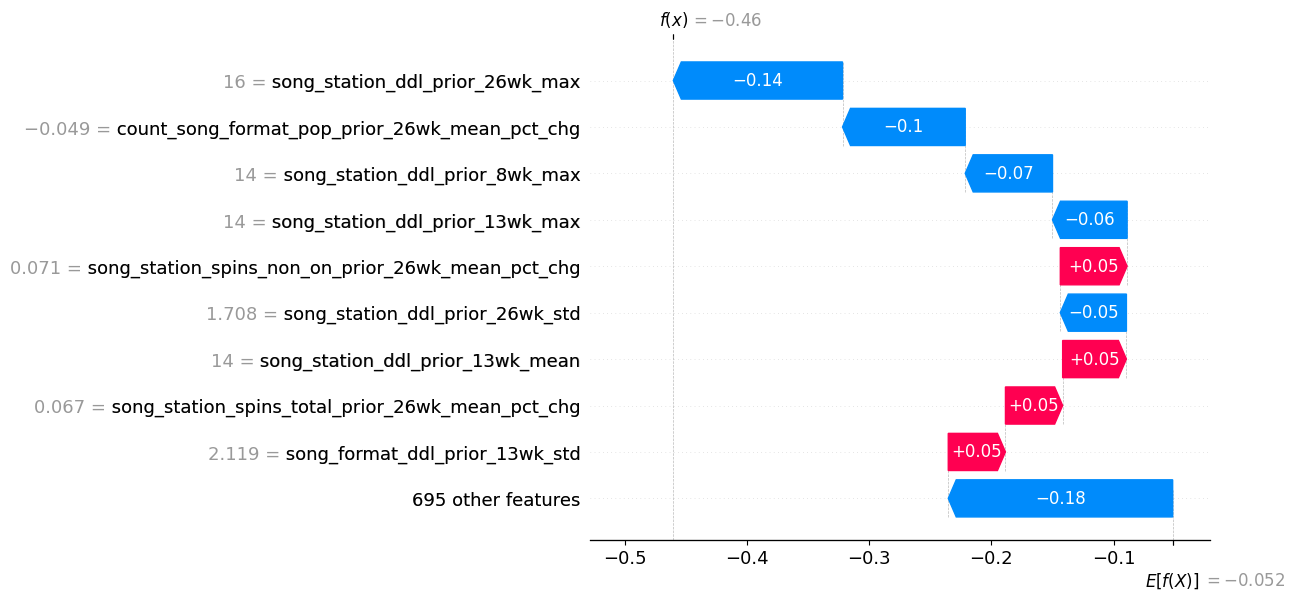

In [39]:
from shap.plots import waterfall
waterfall(shaps[26][0], max_display=10)

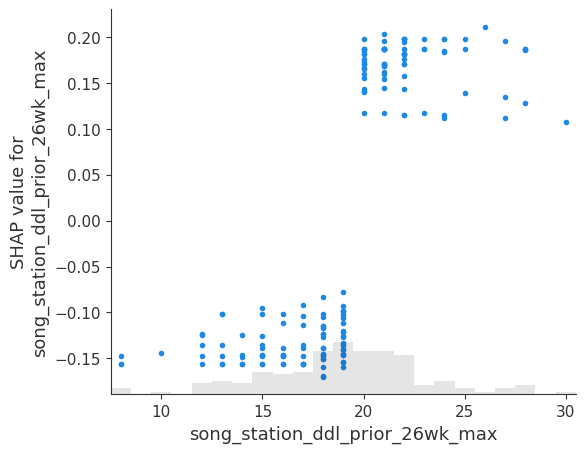

In [41]:
from shap.plots import scatter
scatter(shaps[26][:,"song_station_ddl_prior_26wk_max"])

In [90]:
shaps[26].data

array([[1.48461538e+01, 1.04700000e+03, 1.19567250e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.73333333e+01, 2.27000000e+02, 1.52180000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.42857143e+00, 1.98300000e+03, 1.64000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.26923077e+01, 4.68000000e+02, 1.64000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.50000000e+01, 3.64000000e+02, 1.28671429e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.75000000e+00, 2.38000000e+02, 1.64000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [91]:
X_train

,,,,song_station_ddl_prior_26wk_mean,song_format_spins_am_pm_dr_prior_4wk_max,med_completed_count_prior_unv_prior_8wk_mean,song_format_ddl_prior_26wk_max,song_station_ddl_prior_4wk_std,song_station_spins_am_pm_dr_prior_4wk_max,song_station_spins_am_pm_dr_prior_8wk_min,count_song_format_pop_prior_8wk_min,artist_market_spins_am_pm_dr_prior_4wk_max,artist_market_spins_am_pm_dr_prior_4wk_std,...,"hit_spins_bucket_(1250.0, 1500.0]","hit_spins_bucket_(1500.0, 1750.0]","hit_spins_bucket_(1750.0, 2000.0]","hit_spins_bucket_(2000.0, 2250.0]","hit_spins_bucket_(2250.0, 2500.0]","hit_spins_bucket_(2500.0, 2750.0]","hit_spins_bucket_(2750.0, 3000.0]","hit_spins_bucket_(3000.0, 3250.0]","hit_spins_bucket_(3250.0, 3500.0]","hit_spins_bucket_(3500.0, 3750.0]"
mediabase_id,call_letters,weeks_since_hit,hit_tag_year,,,,,,,,,,,,,,,,,,,,,
2553815,WWPW-FM,26.0,2020,14.846154,1047.0,119567.250000,18.0,1.414214e+00,15.0,6.0,3.0,15.0,4.031129,...,0,0,0,0,0,0,0,0,0,0
1086587,KYLD-FM,26.0,2022,17.333333,227.0,15218.000000,29.0,6.363961e+00,0.0,0.0,1.0,11.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
2720292,KHKS-FM,26.0,2021,9.428571,1983.0,164.000000,15.0,9.192388e+00,18.0,0.0,1.0,236.0,9.105859,...,0,0,0,0,0,0,0,0,0,0
2553815,KKRZ-FM,26.0,2020,14.600000,2063.0,113256.750000,18.0,7.778175e+00,1.0,1.0,3.0,1.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
2722189,WHYI-FM,26.0,2021,14.888889,2808.0,164.000000,19.0,3.535534e+00,16.0,9.0,2.0,44.0,2.500000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720314,KHKS-FM,26.0,2022,14.800000,1140.0,164.000000,24.0,1.192093e-07,27.0,12.0,6.0,106.0,2.943920,...,0,0,1,0,0,0,0,0,0,0
2597601,WKQI-FM,26.0,2021,13.166667,2584.0,164.000000,16.0,2.121320e+00,25.0,1.0,1.0,98.0,18.876794,...,0,0,0,0,0,0,0,0,0,0
2645722,WFLZ-FM,26.0,2021,12.692308,468.0,164.000000,17.0,2.828427e+00,33.0,8.0,1.0,56.0,11.328430,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# collect all features
all_features_len = len(feature_cols) + len(pd.get_dummies(df_train_prep[['market_name', 'hit_spins_bucket']]).columns)
all_features = feature_cols + list(pd.get_dummies(df_train_prep[['market_name', 'hit_spins_bucket']]).columns)

In [84]:
feature_imps = {}
for wk in best_estimators_gbm.keys():
    feature_names = best_estimators_gbm[wk].estimator_.feature_names_in_
    feature_imps[wk] = pd.DataFrame(best_estimators_gbm[wk].estimator_.feature_importances_, index=feature_names,
             columns=['feature_importance_week']).sort_values(by=['feature_importance_week'], ascending=False)

In [85]:
df_imps = feature_imps[13]
importances = df_imps[df_imps['feature_importance_week'] > 0][:7]
features = list(df_imps[df_imps['feature_importance_week'] > 0][:7].index)
indices = np.arange(0,16)

In [87]:
import re
freq_imps = {key: pd.unique([re.sub('[1-9]{1}wk_', '', re.sub('[1-9]{2}wk_', '', col)) for col in list(feature_imps[key][:10].index)]) for key in feature_imps}

In [88]:
freq_imps_dict = {}

for key in freq_imps.keys():
    for col in freq_imps[key]:
        if col in freq_imps_dict:
            freq_imps_dict[col] = freq_imps_dict[col] + 1
        else:
            freq_imps_dict[col] = 1

In [89]:
freq_dict = dict(sorted(freq_imps_dict.items(), key=lambda item: item[1], reverse=True))
df_frq_dict = pd.DataFrame([(i, j)  for i, j in freq_dict.items()],
                   columns=['keys','values'])

In [90]:
df_frq_dict['perc'] = df_frq_dict['values']/49

In [91]:
df_frq_dict

,keys,values,perc
0,song_station_ddl_prior_max,50,1.020408
1,song_station_ddl_prior_mean,32,0.653061
2,song_format_ddl_prior_min,22,0.448980
3,song_format_ddl_prior_mean,19,0.387755
4,song_format_ddl_prior_std,19,0.387755
...,...,...,...
81,artist_station_spins_total_prior_min_pct_chg,1,0.020408
82,mr_completed_count_prior_unv_prior_max_pct_chg,1,0.020408
83,max_completed_count_prior_unv_prior_mean_pct_chg,1,0.020408
84,artist_format_spins_am_pm_dr_prior_max_pct_chg,1,0.020408


In [94]:
importances

,feature_importance_week
song_station_ddl_prior_13wk_max,0.390176
song_station_spins_non_on_prior_4wk_mean,0.092250
artist_station_spins_am_pm_dr_prior_8wk_min,0.076347
song_station_ddl_prior_8wk_max,0.068780
song_station_ddl_prior_13wk_mean,0.043209
song_format_spins_am_pm_dr_prior_4wk_min,0.035077
song_market_spins_am_pm_dr_prior_4wk_max,0.029833


In [85]:
np.arange(5.0, 0, - 0.5)

array([5. , 4.5, 4. , 3.5, 3. , 2.5, 2. , 1.5, 1. , 0.5])

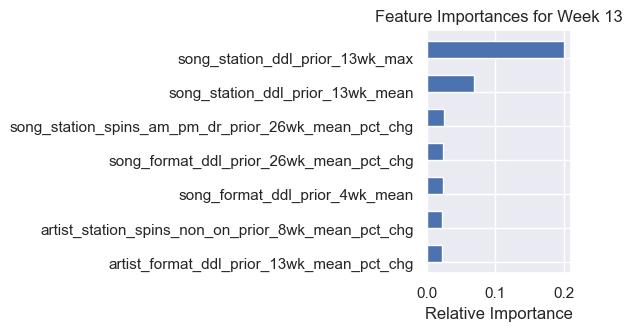

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
plt.title('Feature Importances for Week 13')
fig = plt.gcf()
fig.set_size_inches((6,8))
plt.barh(np.arange(0.7, 0, - 0.1), importances['feature_importance_week'], height=0.05, color='b', align='edge')
plt.yticks(np.arange(0.7, 0, - 0.1), features)
plt.xlabel('Relative Importance')
plt.tight_layout()
ax = plt.gca()
ax.set_aspect(0.5)
plt.tight_layout()
plt.savefig('feature_imp_surv.jpeg', format='jpeg', dpi=300)

In [69]:
feature_imps_markets = {feat: feature_imps[feat][feature_imps[feat].index.map(lambda s: s.startswith('market_name_'))][:10] for feat in feature_imps}

In [70]:
feature_imps_markets

{3:                             feature_importance_week
 market_name_Pittsburgh                     0.007480
 market_name_Atlanta                        0.003951
 market_name_Nashville                      0.003471
 market_name_Orlando                        0.002857
 market_name_San Francisco                  0.000000
 market_name_Seattle                        0.000000
 market_name_St. Louis                      0.000000
 market_name_Tampa                          0.000000
 market_name_Washington, DC                 0.000000
 market_name_Salt Lake City                 0.000000,
 4:                             feature_importance_week
 market_name_Atlanta                        0.010437
 market_name_Pittsburgh                     0.003184
 market_name_Nashville                      0.001049
 market_name_Minneapolis                    0.000902
 market_name_New York                       0.000770
 market_name_Columbus, OH                   0.000615
 market_name_Raleigh                   

In [149]:
feature_imps[26]

,feature_importance_week
song_station_ddl_prior_26wk_max,0.050022
song_station_ddl_prior_13wk_max,0.037037
count_song_format_pop_prior_4wk_std,0.026223
song_station_spins_total_prior_4wk_max,0.023987
song_station_spins_total_prior_13wk_mean,0.022314
...,...
artist_format_spins_total_prior_26wk_min,0.000000
artist_format_pop_prior_4wk_max,0.000000
max_thumbs_up_rate_prior_unv_prior_8wk_mean,0.000000
std_thumbs_up_rate_prior_unv_prior_4wk_std,0.000000


In [103]:
df_hits_tracker.groupby(['hit_spins_bucket_curr', 'censoring_flg'])['spins_to_burnout_from_hit'].describe()

count         mean         std     min  \
hit_spins_bucket_curr censoring_flg                                            
early                 False             3.0  3007.000000  460.348781  2518.0   
                      True             80.0  1183.475000  460.559428   183.0   
mid                   False            16.0  2882.375000  278.648135  2514.0   
                      True            643.0  1099.024883  500.014847     4.0   
late                  False            18.0  2936.833333  365.728001  2502.0   
                      True           1759.0   773.322911  523.921724     8.0   

                                         25%     50%      75%     max  
hit_spins_bucket_curr censoring_flg                                    
early                 False          2794.50  3071.0  3251.50  3432.0  
                      True            809.00  1235.5  1523.00  2155.0  
mid                   False          2652.00  2915.5  2993.75  3518.0  
                      True            743.00  1063.0  1410.50  2437.0  
late                  False          2579.75  2942.0  3138.50  3652.0  
                      True            359.50   681.0  1079.50  2481.0

#### Risk Scores and Survival Function

In [42]:
risk_scores_gbm_train=pd.DataFrame()
risk_scores_gbm_test=pd.DataFrame()
# surv_fn_gbm = {}
# for wk in weeks_range:
for wk in weeks_range:
    X_train = df_test_sets[df_test_sets.index.get_level_values(2) == wk][feature_cols + cat_cols]
    X_train = pd.get_dummies(X_train, columns=['market_name', 'hit_spins_bucket'])
    # X_train[feature_cols] = StandardScaler().fit_transform(X_train[feature_cols])
    y_train = df_test_sets[df_test_sets.index.get_level_values(2) == wk][target_cols]
    feature_names = best_estimators_gbm[wk].estimator.feature_names_in_
    missing_cols = list(set(feature_names) - set(X_train.columns))
    print(wk)
    print(missing_cols)
    X_train[missing_cols] = 0
    df_temp = pd.concat([y_train, pd.DataFrame(best_estimators_gbm[wk].predict(X_train[feature_names]), index=X_train.index, columns=['predicted_risk_score'])] ,axis=1).assign(**{'week': wk})
    risk_scores_gbm_train = pd.concat([risk_scores_gbm_train, df_temp])
    # surv_fn_gbm[wk] = best_estimators_gbm[wk].predict_survival_function(X_train[feature_names])

3
[]
4
[]
5
[]
6
[]
7
[]
8
[]
9
[]
10
[]
11
[]
12
[]
13
[]
14
[]
15
[]
16
[]
17
[]
18
[]
19
[]
20
[]
21
['market_name_Denver']
22
[]
23
[]
24
[]
25
[]
26
[]
27
[]
28
['market_name_Denver']
29
[]
30
[]
31
[]
32
[]
33
['market_name_Denver']
34
[]
35
[]
36
[]
37
[]
38
[]
39
['market_name_Dallas']
40
['market_name_Dallas']
41
['market_name_Chicago', 'market_name_Dallas']
42
['market_name_Minneapolis']
43
['market_name_Chicago', 'market_name_Minneapolis']
44
['market_name_Raleigh']
45
['market_name_Denver']
46
['market_name_Denver', 'market_name_Raleigh']
47
['market_name_Pittsburgh', 'market_name_Denver']
48
['market_name_Denver', 'market_name_Salt Lake City']
49
[]
50
[]
51
[]
52
[]


In [132]:
test_risk_scores = risk_scores_gbm_train[risk_scores_gbm_train['week']==26].sort_values(by=['predicted_risk_score'])

In [56]:
test_risk_scores

censoring_flg  \
mediabase_id call_letters weeks_since_hit hit_tag_year                  
2691407      KDHT-FM      8.0             2022                  False   
2780626      KBKS-FM      8.0             2022                  False   
2598403      WXKS-FM      8.0             2020                   True   
             WHYI-FM      8.0             2020                  False   
2808913      WIHT-FM      8.0             2022                  False   
...                                                               ...   
2552475      WIOQ-FM      8.0             2020                   True   
2653252      WFLZ-FM      8.0             2021                   True   
2794968      KHFI-FM      8.0             2022                   True   
2550056      KKRZ-FM      8.0             2020                   True   
             KZHT-FM      8.0             2020                   True   

                                                        spins_to_burnout_curr  \
mediabase_id call_letters weeks_since_hit hit_tag_year                          
2691407      KDHT-FM      8.0             2022                         2225.0   
2780626      KBKS-FM      8.0             2022                         2018.0   
2598403      WXKS-FM      8.0             2020                          326.0   
             WHYI-FM      8.0             2020                         2416.0   
2808913      WIHT-FM      8.0             2022                         2139.0   
...                                                                       ...   
2552475      WIOQ-FM      8.0             2020                          234.0   
2653252      WFLZ-FM      8.0             2021                            0.0   
2794968      KHFI-FM      8.0             2022                          894.0   
2550056      KKRZ-FM      8.0             2020                          104.0   
             KZHT-FM      8.0             2020                           39.0   

                                                        predicted_risk_score  \
mediabase_id call_letters weeks_since_hit hit_tag_year                         
2691407      KDHT-FM      8.0             2022                     -0.801785   
2780626      KBKS-FM      8.0             2022                     -0.777003   
2598403      WXKS-FM      8.0             2020                     -0.736618   
             WHYI-FM      8.0             2020                     -0.729287   
2808913      WIHT-FM      8.0             2022                     -0.727562   
...                                                                      ...   
2552475      WIOQ-FM      8.0             2020                      0.681359   
2653252      WFLZ-FM      8.0             2021                      0.699872   
2794968      KHFI-FM      8.0             2022                      0.701442   
2550056      KKRZ-FM      8.0             2020                      0.753573   
             KZHT-FM      8.0             2020                      0.759571   

                                                        week  \
mediabase_id call_letters weeks_since_hit hit_tag_year         
2691407      KDHT-FM      8.0             2022             8   
2780626      KBKS-FM      8.0             2022             8   
2598403      WXKS-FM      8.0             2020             8   
             WHYI-FM      8.0             2020             8   
2808913      WIHT-FM      8.0             2022             8   
...                                                      ...   
2552475      WIOQ-FM      8.0             2020             8   
2653252      WFLZ-FM      8.0             2021             8   
2794968      KHFI-FM      8.0             2022             8   
2550056      KKRZ-FM      8.0             2020             8   
             KZHT-FM      8.0             2020             8   

                                                        predcited_risk_score_quintile  \
mediabase_id call_letters weeks_since_hit hit_tag_year                                  


In [67]:
risk_scores_gbm_train = risk_scores_gbm_train.assign(**{'predcited_risk_score_quintile' : risk_scores_gbm_train.groupby(['weeks_since_hit']).apply(lambda x: pd.qcut(x['predicted_risk_score'], q=5, duplicates='drop', labels=False)).droplevel(0)})

In [68]:
risk_scores_gbm_train['actual_quintile'] = 1
risk_scores_gbm_train.loc[(risk_scores_gbm_train['censoring_flg'] == False), 'actual_quintile'] = 0
risk_scores_gbm_train.loc[(risk_scores_gbm_train['spins_to_burnout_curr'] < 100) , 'actual_quintile'] = 2

In [69]:
risk_scores_gbm_train['predcited_risk_score_quintile_n'] = risk_scores_gbm_train['predcited_risk_score_quintile']

In [70]:
risk_scores_gbm_train.loc[((risk_scores_gbm_train['predcited_risk_score_quintile'] < 4) & (risk_scores_gbm_train['predcited_risk_score_quintile'] > 0)), 'predcited_risk_score_quintile_n'] = 1

In [71]:
risk_scores_gbm_train.loc[(risk_scores_gbm_train['predcited_risk_score_quintile'] == 4), 'predcited_risk_score_quintile_n'] = 2

In [62]:
risk_scores_gbm_train

,,,,censoring_flg,spins_to_burnout_curr,predicted_risk_score,week,predcited_risk_score_quintile,actual_quintile,predcited_risk_score_quintile_n,spins_to_burnout_curr_quintile
mediabase_id,call_letters,weeks_since_hit,hit_tag_year,,,,,,,,
2483821,KDWB-FM,3.0,2020,True,241.0,0.216271,3,3,1,1,0
2552613,WHTZ-FM,3.0,2020,True,1502.0,-0.327369,3,1,1,1,2
2720314,WXKS-FM,3.0,2022,True,97.0,0.462239,3,4,2,2,0
2583267,KHFI-FM,3.0,2021,True,379.0,0.357633,3,3,1,1,1
2509968,WHQC-FM,3.0,2020,False,2493.0,-0.818070,3,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
2422949,WNCI-FM,52.0,2020,False,2392.0,-0.350302,52,0,0,0,4
2625043,WDCG-FM,52.0,2021,False,509.0,-0.161642,52,2,0,1,1
2553815,KHFI-FM,52.0,2020,False,1699.0,-0.357548,52,0,0,0,1


In [72]:
risk_scores_gbm_train = risk_scores_gbm_train.assign(**{'spins_to_burnout_curr_quintile' : risk_scores_gbm_train.groupby(['weeks_since_hit']).apply(lambda x: pd.qcut(x['spins_to_burnout_curr'], q=5, duplicates='drop', labels=False)).droplevel(0)})

In [64]:
import matplotlib.pyplot as plt

Text(0.5, 0.98, '')

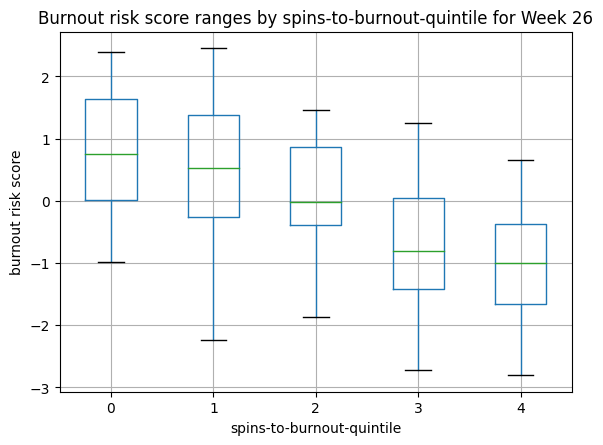

In [79]:
risk_scores_gbm_train[risk_scores_gbm_train['week'] == 16].boxplot(['predicted_risk_score'], by=['spins_to_burnout_curr_quintile'])
plt.ylabel('burnout risk score')
plt.xlabel('spins-to-burnout-quintile')
plt.title('Burnout risk score ranges by spins-to-burnout-quintile for Week 26')
fig = plt.gcf()
fig.suptitle('')
# plt.savefig('burn_risk_score.jpeg', format='jpeg', dpi=300)

In [237]:
from sklearn.metrics import confusion_matrix
mask = risk_scores_gbm_train['week']==13
confusion_matrix(y_true=risk_scores_gbm_train.loc[mask, 'actual_quintile'], y_pred=risk_scores_gbm_train.loc[mask, 'predcited_risk_score_quintile_n'], labels=[0, 1, 2])

array([[150, 208,  13],
       [  8, 231,  77],
       [  6,  50,  73]])

In [210]:
risk_scores_gbm_train.loc[mask, 'actual_quintile']

mediabase_id  call_letters  weeks_since_hit  hit_tag_year
2750191       KKRZ-FM       6.0              2022            4
2671521       WXKS-FM       6.0              2021            2
2672451       WRVW-FM       6.0              2021            2
2834725       WHTZ-FM       6.0              2022            2
2591543       WKST-FM       6.0              2020            2
                                                            ..
2708592       WKSC-FM       6.0              2021            2
2542279       KDWB-FM       6.0              2020            2
2744465       KBKS-FM       6.0              2022            2
2524291       WXXL-FM       6.0              2020            2
2687228       KYLD-FM       6.0              2021            4
Name: actual_quintile, Length: 1033, dtype: int64

In [193]:
risk_scores_gbm_train.groupby(['weeks_since_hit']).apply(lambda x: pd.qcut(x['predicted_risk_score'], q=5, duplicates='drop', labels=False)).droplevel(0)

mediabase_id  call_letters  weeks_since_hit  hit_tag_year
2582475       KDHT-FM       3.0              2022            1
2708592       WDCG-FM       3.0              2021            2
2620824       KDWB-FM       3.0              2020            2
2720292       KHTS-FM       3.0              2022            0
2578378       KHKS-FM       3.0              2020            4
                                                            ..
2638380       WHTZ-FM       52.0             2021            0
2697903       WWPW-FM       52.0             2021            2
2582475       WHYI-FM       52.0             2021            3
2625043       WFLZ-FM       52.0             2021            1
2502821       KDWB-FM       52.0             2020            0
Name: predicted_risk_score, Length: 28106, dtype: int64

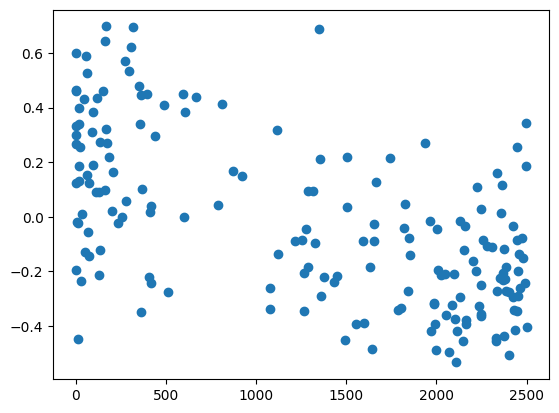

In [90]:
import matplotlib.pyplot as plt
plt.scatter(test_risk_scores['spins_to_burnout_curr'], test_risk_scores['predicted_risk_score'])

In [333]:
risk_scores_gbm_train[(risk_scores_gbm_train['week'] == 26) & (risk_scores_gbm_train.index.get_level_values(1) == 'KIIS-FM')]

,,,,censoring_flg,spins_to_burnout_curr,predicted_risk_score,week,predcited_risk_score_quintile,actual_quintile,predcited_risk_score_quintile_n,spins_to_burnout_curr_quintile
mediabase_id,call_letters,weeks_since_hit,hit_tag_year,,,,,,,,
2710332,KIIS-FM,26.0,2021,False,2237.0,-0.938894,26,1,0,1,3
2505085,KIIS-FM,26.0,2020,False,1199.0,-0.035873,26,2,0,1,2
2552613,KIIS-FM,26.0,2020,True,149.0,2.174482,26,4,1,2,0
2798183,KIIS-FM,26.0,2022,True,1301.0,0.607021,26,3,1,1,2
2546157,KIIS-FM,26.0,2020,False,1960.0,-1.086304,26,1,0,1,3
2554446,KIIS-FM,26.0,2020,False,939.0,0.815524,26,3,0,1,1
2550239,KIIS-FM,26.0,2020,True,67.0,1.710423,26,4,2,2,0
2398331,KIIS-FM,26.0,2020,False,2332.0,-1.015808,26,1,0,1,4
2541634,KIIS-FM,26.0,2020,False,2432.0,-1.686730,26,0,0,0,4


In [80]:
# Non-Burnout Instance
mask = (risk_scores_gbm_train.index.get_level_values(0) == 2256903) & (risk_scores_gbm_train.index.get_level_values(1) == 'KIIS-FM')
df_burn_example = risk_scores_gbm_train.loc[mask]

Text(0.5, 0.98, 'Predicted risk quintile by week for Die For You (THE WEEKND) at KIIS-FM')

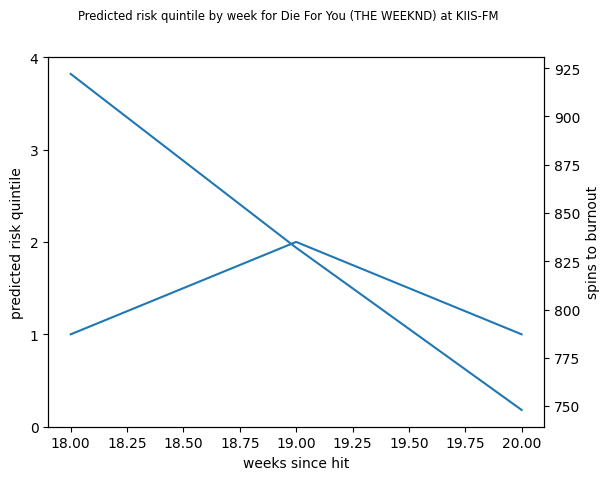

In [81]:
fig, ax = plt.subplots()
ax.plot(df_burn_example['week'], df_burn_example['predcited_risk_score_quintile'])
ax.set_yticks([0,1,2,3,4])
ax.set_xlabel('weeks since hit')
ax.set_ylabel('predicted risk quintile')
secax=ax.twinx()
secax.plot(df_burn_example['week'], df_burn_example['spins_to_burnout_curr'])
secax.set_ylabel('spins to burnout')
plt.suptitle('Predicted risk quintile by week for Die For You (THE WEEKND) at KIIS-FM', fontsize='small')
# plt.savefig('pred_risk_quintile.jpeg', format='jpeg', dpi=300)

#### risk quintile for burnout instance

In [82]:
mask = (df_features['mediabase_id'] == 2552613) & (df_features['call_letters'] == 'KIIS-FM') & (df_features['weeks_since_hit'] >= 3) & (df_features['weeks_since_hit'] <= 28)
df_burn_example_with = df_features.loc[mask][['weeks_since_hit', 'song_station_ddl', 'song_station_ddl_prior_1wk_mean']]

In [83]:
df_burn_example

censoring_flg  \
mediabase_id call_letters weeks_since_hit hit_tag_year                  
2256903      KIIS-FM      18.0            2022                  False   
                          19.0            2022                  False   
                          20.0            2022                  False   

                                                        spins_to_burnout_curr  \
mediabase_id call_letters weeks_since_hit hit_tag_year                          
2256903      KIIS-FM      18.0            2022                          922.0   
                          19.0            2022                          832.0   
                          20.0            2022                          748.0   

                                                        predicted_risk_score  \
mediabase_id call_letters weeks_since_hit hit_tag_year                         
2256903      KIIS-FM      18.0            2022                     -0.296930   
                          19.0            2022                     -0.031515   
                          20.0            2022                     -0.098864   

                                                        week  \
mediabase_id call_letters weeks_since_hit hit_tag_year         
2256903      KIIS-FM      18.0            2022            18   
                          19.0            2022            19   
                          20.0            2022            20   

                                                        predcited_risk_score_quintile  \
mediabase_id call_letters weeks_since_hit hit_tag_year                                  
2256903      KIIS-FM      18.0            2022                                      1   
                          19.0            2022                                      2   
                          20.0            2022                                      1   

                                                        actual_quintile  \
mediabase_id call_letters weeks_since_hit hit_tag_year                    
2256903      KIIS-FM      18.0            2022                        0   
                          19.0            2022                        0   
                          20.0            2022                        0   

                                                        predcited_risk_score_quintile_n  \
mediabase_id call_letters weeks_since_hit hit_tag_year                                    
2256903      KIIS-FM      18.0            2022                                        1   
                          19.0            2022                                        1   
                          20.0            2022                                        1   

                                                        spins_to_burnout_curr_quintile  
mediabase_id call_letters weeks_since_hit hit_tag_year                                  
2256903      KIIS-FM      18.0            2022                                       2  
                          19.0            2022                                       2  
                          20.0            2022                                       1

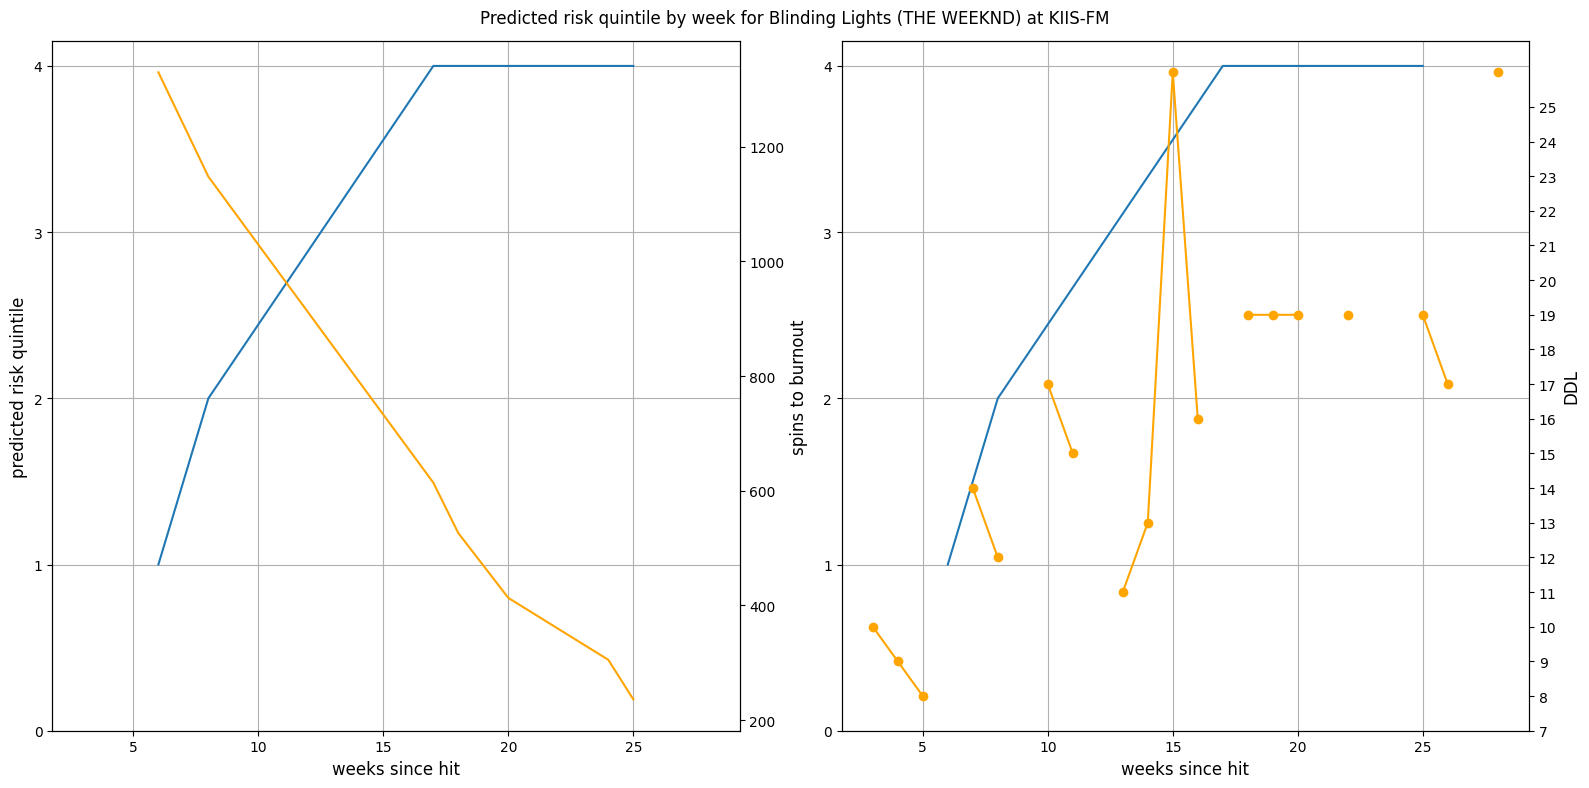

In [84]:
mask = (risk_scores_gbm_train.index.get_level_values(0) == 2552613) & (
            risk_scores_gbm_train.index.get_level_values(1) == 'KIIS-FM')
df_burn_example = risk_scores_gbm_train.loc[mask]
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
fig.set_size_inches(16,8)
ax1.plot(df_burn_example['week'], df_burn_example['predcited_risk_score_quintile'])
ax1.set_yticks([0, 1, 2, 3, 4])
ax1.set_xlabel('weeks since hit', fontsize='large')
ax1.set_ylabel('predicted risk quintile', fontsize='large')
secax = ax1.twinx()
secax.plot(df_burn_example['week'], df_burn_example['spins_to_burnout_curr'], c='orange')
secax.set_ylabel('spins to burnout', fontsize='large')

ax2.plot(df_burn_example['week'], df_burn_example['predcited_risk_score_quintile'])
ax2.set_yticks([0, 1, 2, 3, 4])
ax2.set_xlabel('weeks since hit', fontsize='large')
secax2 = ax2.twinx()
secax2.plot(df_burn_example_with['weeks_since_hit'], df_burn_example_with['song_station_ddl'], marker='o', c='orange')
secax2.set_ylabel('DDL', fontsize='large')
secax2.set_yticks(np.arange(7,26))
plt.suptitle('Predicted risk quintile by week for Blinding Lights (THE WEEKND) at KIIS-FM', fontsize='large')
plt.tight_layout()
ax1.grid()
ax2.grid()
# plt.savefig('pred_risk_quintile_with_burn.jpeg', format='jpeg', dpi=300)

#### predicted survival function

In [127]:
surv_fn_gbm = {}
# surv_fn_gbm = {}
# for wk in weeks_range:
for wk in weeks_range:
    X_train = df_test_sets[df_test_sets.index.get_level_values(2) == wk][feature_cols + cat_cols]
    X_train = pd.get_dummies(X_train, columns=['market_name', 'hit_spins_bucket'])
    # X_train[feature_cols] = StandardScaler().fit_transform(X_train[feature_cols])
    y_train = df_test_sets[df_test_sets.index.get_level_values(2) == wk][target_cols]
    feature_names = best_estimators_gbm[wk].estimator.feature_names_in_
    missing_cols = list(set(feature_names) - set(X_train.columns))
    print(wk)
    print(missing_cols)
    X_train[missing_cols] = 0
    # mask = (X_train.index.get_level_values(0) == 2256903) & (X_train.index.get_level_values(1) == 'KIIS-FM')
    # if X_train.loc[mask][feature_names].shape[0] > 0:
    if wk == 26:
        surv_fn_gbm[wk] = pd.DataFrame(best_estimators_gbm[wk].predict_survival_function(X_train[feature_names]), index=X_train.index)

3
[]
4
[]
5
[]
6
[]
7
[]
8
[]
9
[]
10
[]
11
[]
12
[]
13
[]
14
[]
15
[]
16
[]
17
[]
18
[]
19
[]
20
[]
21
['market_name_Denver']
22
[]
23
[]
24
[]
25
[]
26
[]
27
[]
28
['market_name_Denver']
29
[]
30
[]
31
[]
32
[]
33
['market_name_Denver']
34
[]
35
[]
36
[]
37
[]
38
[]
39
['market_name_Dallas']
40
['market_name_Dallas']
41
['market_name_Chicago', 'market_name_Dallas']
42
['market_name_Minneapolis']
43
['market_name_Chicago', 'market_name_Minneapolis']
44
['market_name_Raleigh']
45
['market_name_Denver']
46
['market_name_Denver', 'market_name_Raleigh']
47
['market_name_Pittsburgh', 'market_name_Denver']
48
['market_name_Denver', 'market_name_Salt Lake City']
49
[]
50
[]
51
[]
52
[]


In [135]:
df_join_curves = test_risk_scores.join(surv_fn_gbm[26], how='right').sort_values(by=['predicted_risk_score'], ascending=False)

In [138]:
df_plot_curves = df_join_curves[df_join_curves['predcited_risk_score_quintile_n'] == df_join_curves['actual_quintile']]

In [139]:
df_plot_curves

,,,,censoring_flg,spins_to_burnout_curr,predicted_risk_score,week,predcited_risk_score_quintile,actual_quintile,predcited_risk_score_quintile_n,spins_to_burnout_curr_quintile,0
mediabase_id,call_letters,weeks_since_hit,hit_tag_year,,,,,,,,,
2524291,WKSC-FM,26.0,2020,True,0.0,2.025283,26,4,2,2,0,"StepFunction(x=array([0.000e+00, 1.000e+00, 2...."
2554446,WKSC-FM,26.0,2020,True,0.0,1.878154,26,4,2,2,0,"StepFunction(x=array([0.000e+00, 1.000e+00, 2...."
2524291,WDCG-FM,26.0,2020,True,0.0,1.807053,26,4,2,2,0,"StepFunction(x=array([0.000e+00, 1.000e+00, 2...."
2544637,WFLZ-FM,26.0,2020,True,0.0,1.758474,26,4,2,2,0,"StepFunction(x=array([0.000e+00, 1.000e+00, 2...."
2552613,WIOQ-FM,26.0,2020,True,62.0,1.577798,26,4,2,2,0,"StepFunction(x=array([0.000e+00, 1.000e+00, 2...."
...,...,...,...,...,...,...,...,...,...,...,...,...
2653276,KKRZ-FM,26.0,2021,False,2133.0,-1.135345,26,0,0,0,3,"StepFunction(x=array([0.000e+00, 1.000e+00, 2...."
2780626,WRVW-FM,26.0,2022,False,1537.0,-1.138429,26,0,0,0,2,"StepFunction(x=array([0.000e+00, 1.000e+00, 2...."
2671521,WWPW-FM,26.0,2021,False,2296.0,-1.158574,26,0,0,0,3,"StepFunction(x=array([0.000e+00, 1.000e+00, 2...."


In [151]:
idx = (2647678, 'WHTZ-FM', 26.0, 2020)
df_ex_1 = df_plot_curves.loc[[idx]]

In [167]:
df_ex_1.columns= [                  'censoring_flg',           'spins_to_burnout_curr',
                  'predicted_risk_score',                            'week',
         'predcited_risk_score_quintile',                 'actual_quintile',
       'predcited_risk_score_quintile_n',  'spins_to_burnout_curr_quintile',
                                       'step_fn']

In [166]:
df_ex_1.columns[:-1].append('step_fn')

TypeError: all inputs must be Index

In [171]:
df_ex_1['step_fn'].values[0]

StepFunction(x=array([0.000e+00, 1.000e+00, 2.000e+00, 4.000e+00, 7.000e+00, 8.000e+00,
       1.300e+01, 1.500e+01, 1.600e+01, 2.000e+01, 2.100e+01, 2.400e+01,
       3.200e+01, 3.600e+01, 4.100e+01, 4.600e+01, 5.000e+01, 5.400e+01,
       5.700e+01, 5.900e+01, 6.600e+01, 6.700e+01, 7.100e+01, 7.500e+01,
       7.800e+01, 8.100e+01, 8.200e+01, 8.300e+01, 8.400e+01, 8.600e+01,
       8.700e+01, 8.800e+01, 9.000e+01, 9.300e+01, 9.800e+01, 1.000e+02,
       1.060e+02, 1.180e+02, 1.190e+02, 1.200e+02, 1.210e+02, 1.250e+02,
       1.260e+02, 1.290e+02, 1.340e+02, 1.360e+02, 1.370e+02, 1.410e+02,
       1.440e+02, 1.460e+02, 1.470e+02, 1.490e+02, 1.520e+02, 1.550e+02,
       1.570e+02, 1.590e+02, 1.620e+02, 1.630e+02, 1.700e+02, 1.720e+02,
       1.770e+02, 1.790e+02, 1.840e+02, 1.890e+02, 1.920e+02, 2.070e+02,
       2.080e+02, 2.100e+02, 2.140e+02, 2.210e+02, 2.280e+02, 2.300e+02,
       2.350e+02, 2.360e+02, 2.470e+02, 2.560e+02, 2.620e+02, 2.710e+02,
       2.740e+02, 2.830e+02, 2.910e+

In [189]:
import seaborn as sns
sns.set_theme()

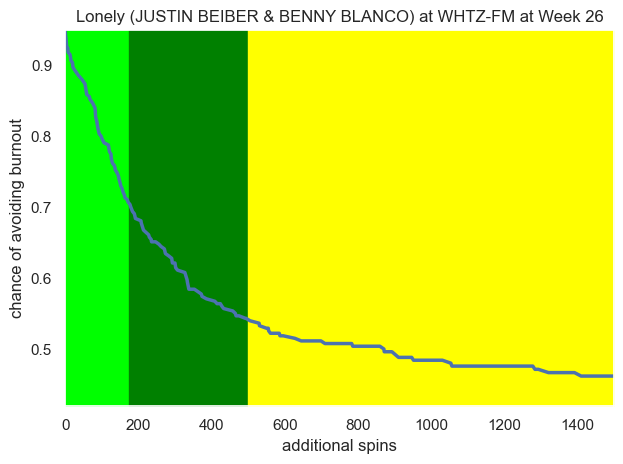

In [213]:
plt.plot(df_ex_1['step_fn'].values[0].x, df_ex_1['step_fn'].values[0].y, linewidth=2.5)
ax = plt.gca()
ax.fill_between([0, 175], 0.42, 0.95, color='lime')
ax.fill_between([175, 500], 0.42, 0.95, color='green')
ax.fill_between([500, 1500], 0.42, 0.95, color='yellow')
ax.grid(False)
plt.xlim([0, 1500])
plt.ylim([0.42, 0.95])
plt.xlabel('additional spins')
plt.ylabel('chance of avoiding burnout')
plt.title('Lonely (JUSTIN BEIBER & BENNY BLANCO) at WHTZ-FM at Week 26')
plt.tight_layout()
plt.savefig('gbyr_shading_example.jpeg', format='jpeg', dpi=300)

In [216]:
mask = (df_features['mediabase_id'] == 2647678) & (df_features['weeks_since_hit'] >= 26) & (df_features['call_letters'] == 'WHTZ-FM')
df_features.loc[mask]

,mediabase_id,song_id,call_letters,market_name,artist_id,format_code,song_release_date,first_callout_date,last_callout_date,first_spin_date,...,artist_format_spins_total_prior_26wk_mean_pct_chg,mr_stream_count_prior_unv_prior_4wk_mean_pct_chg,artist_spins_propn_prior_8wk_mean_pct_chg,artist_format_fav_prior_26wk_mean_pct_chg,artist_format_spins_total_prior_8wk_max_pct_chg,mr_stream_count_prior_unv_prior_26wk_max_pct_chg,first_spin_year,hit_tag_year,spins_to_burnout_curr,hit_spins_bucket_curr
590298,2647678,1488946521,WHTZ-FM,New York,739040771,H1,2020-10-01,2020-12-07,2022-05-16,2020-10-11,...,-0.028395,0.0,0.000000e+00,-0.015038,-0.082760,0.0,2020,2020,30.0,early
590299,2647678,1488946521,WHTZ-FM,New York,739040771,H1,2020-10-01,2020-12-07,2022-05-16,2020-10-11,...,-0.027852,0.0,0.000000e+00,-0.000364,-0.117221,0.0,2020,2020,30.0,early
590300,2647678,1488946521,WHTZ-FM,New York,739040771,H1,2020-10-01,2020-12-07,2022-05-16,2020-10-11,...,-0.039868,0.0,3.108624e-15,0.000364,-0.304926,0.0,2020,2020,30.0,early
590301,2647678,1488946521,WHTZ-FM,New York,739040771,H1,2020-10-01,2020-12-07,2022-05-16,2020-10-11,...,-0.054854,0.0,4.218847e-15,-0.006970,-0.457841,0.0,2020,2020,30.0,early
590302,2647678,1488946521,WHTZ-FM,New York,739040771,H1,2020-10-01,2020-12-07,2022-05-16,2020-10-11,...,-0.062434,0.0,5.995204e-15,0.000000,-0.127724,0.0,2020,2020,30.0,early
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590388,2647678,1488946521,WHTZ-FM,New York,739040771,H1,2020-10-01,2020-12-07,2022-05-16,2020-10-11,...,0.001554,0.0,0.000000e+00,0.000000,0.000000,0.0,2020,2020,-1.0,early
590389,2647678,1488946521,WHTZ-FM,New York,739040771,H1,2020-10-01,2020-12-07,2022-05-16,2020-10-11,...,-0.004655,0.0,0.000000e+00,0.000000,-0.019608,0.0,2020,2020,-1.0,early
590390,2647678,1488946521,WHTZ-FM,New York,739040771,H1,2020-10-01,2020-12-07,2022-05-16,2020-10-11,...,-0.015588,0.0,0.000000e+00,0.000000,-0.020000,0.0,2020,2020,-1.0,early
590391,2647678,1488946521,WHTZ-FM,New York,739040771,H1,2020-10-01,2020-12-07,2022-05-16,2020-10-11,...,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.0,2020,2020,-1.0,early


In [212]:
mask = (df_features['mediabase_id'] == 2647678) & (df_features['call_letters'] == 'WHTZ-FM') & (df_features['weeks_since_hit'] > 0)
df_features.loc[mask]

,mediabase_id,song_id,call_letters,market_name,artist_id,format_code,song_release_date,first_callout_date,last_callout_date,first_spin_date,...,artist_format_spins_total_prior_26wk_mean_pct_chg,mr_stream_count_prior_unv_prior_4wk_mean_pct_chg,artist_spins_propn_prior_8wk_mean_pct_chg,artist_format_fav_prior_26wk_mean_pct_chg,artist_format_spins_total_prior_8wk_max_pct_chg,mr_stream_count_prior_unv_prior_26wk_max_pct_chg,first_spin_year,hit_tag_year,spins_to_burnout_curr,hit_spins_bucket_curr
590273,2647678,1488946521,WHTZ-FM,New York,739040771,H1,2020-10-01,2020-12-07,2022-05-16,2020-10-11,...,0.033301,0.0,0.0,-0.008000,0.000000,0.0,2020,2020,911.0,early
590274,2647678,1488946521,WHTZ-FM,New York,739040771,H1,2020-10-01,2020-12-07,2022-05-16,2020-10-11,...,0.070417,0.0,0.0,0.000000,0.264807,0.0,2020,2020,827.0,early
590275,2647678,1488946521,WHTZ-FM,New York,739040771,H1,2020-10-01,2020-12-07,2022-05-16,2020-10-11,...,0.097364,0.0,0.0,0.000000,0.300832,0.0,2020,2020,744.0,early
590276,2647678,1488946521,WHTZ-FM,New York,739040771,H1,2020-10-01,2020-12-07,2022-05-16,2020-10-11,...,0.085625,0.0,0.0,0.000000,0.074314,0.0,2020,2020,683.0,early
590277,2647678,1488946521,WHTZ-FM,New York,739040771,H1,2020-10-01,2020-12-07,2022-05-16,2020-10-11,...,0.032454,0.0,0.0,-0.005376,0.000000,0.0,2020,2020,600.0,early
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590388,2647678,1488946521,WHTZ-FM,New York,739040771,H1,2020-10-01,2020-12-07,2022-05-16,2020-10-11,...,0.001554,0.0,0.0,0.000000,0.000000,0.0,2020,2020,-1.0,early
590389,2647678,1488946521,WHTZ-FM,New York,739040771,H1,2020-10-01,2020-12-07,2022-05-16,2020-10-11,...,-0.004655,0.0,0.0,0.000000,-0.019608,0.0,2020,2020,-1.0,early
590390,2647678,1488946521,WHTZ-FM,New York,739040771,H1,2020-10-01,2020-12-07,2022-05-16,2020-10-11,...,-0.015588,0.0,0.0,0.000000,-0.020000,0.0,2020,2020,-1.0,early
590391,2647678,1488946521,WHTZ-FM,New York,739040771,H1,2020-10-01,2020-12-07,2022-05-16,2020-10-11,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,2020,2020,-1.0,early


In [153]:
idx = (2625043, 'WHTZ-FM', 26.0, 2021)
df_ex_2 = df_plot_curves.loc[[idx]]

In [173]:
df_ex_2.columns= [                  'censoring_flg',           'spins_to_burnout_curr',
                  'predicted_risk_score',                            'week',
         'predcited_risk_score_quintile',                 'actual_quintile',
       'predcited_risk_score_quintile_n',  'spins_to_burnout_curr_quintile',
                                       'step_fn']

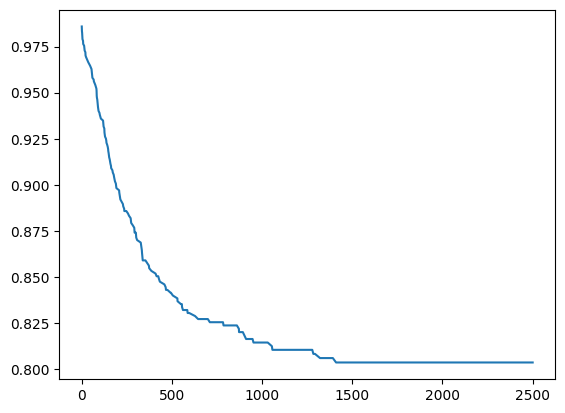

In [175]:
plt.plot(df_ex_2['step_fn'].values[0].x, df_ex_2['step_fn'].values[0].y)

In [126]:
pd.DataFrame(surv_fn_gbm[26], df_test_sets[df_test_sets.index.get_level_values(2) == wk]

,,,,censoring_flg,spins_to_burnout_curr,song_station_spins_total_prior_8wk_max,mr_completed_count_prior_unv_prior_4wk_min,artist_station_spins_am_pm_dr_prior_26wk_std,med_completed_count_prior_unv_prior_26wk_min_pct_chg,artist_market_spins_non_on_prior_4wk_std,artist_format_ddl_prior_13wk_min_pct_chg,song_format_spins_am_pm_dr_prior_4wk_min,artist_format_ddl_prior_26wk_max_pct_chg,...,song_market_spins_total_prior_26wk_mean_pct_chg,mr_completed_count_prior_unv_prior_4wk_std,artist_station_spins_non_on_prior_4wk_min_pct_chg,max_completed_rate_prior_unv_prior_26wk_std,mean_thumbs_up_rate_prior_unv_prior_8wk_max,artist_format_ddl_prior_4wk_max_pct_chg,song_format_spins_total_prior_26wk_mean_pct_chg,artist_market_spins_non_on_prior_13wk_min_pct_chg,market_name,hit_spins_bucket
mediabase_id,call_letters,weeks_since_hit,hit_tag_year,,,,,,,,,,,,,,,,,,,,,
2550239,WRVW-FM,52.0,2021,False,2341.0,6.0,192267.0,1.720912,0.000000,8.500000,0.0,571.0,0.00,...,-0.014085,16796.445160,3.000000,0.000000e+00,0.860659,0.692308,-0.022437,0.000000,Nashville,"(2000.0, 2250.0]"
2720292,WHYI-FM,52.0,2022,False,2227.0,1.0,6.0,18.817545,0.000000,11.902381,0.0,498.0,0.00,...,-0.031063,0.000000,0.000000,0.000000e+00,0.237579,0.000000,-0.028475,0.000000,Miami,"(750.0, 1000.0]"
2597601,KHTS-FM,52.0,2021,False,2069.0,9.0,6.0,2.004994,0.000000,2.380476,0.0,959.0,0.00,...,-0.003670,0.000000,0.000000,0.000000e+00,0.237579,-0.222222,-0.007901,0.000000,San Diego,"(1750.0, 2000.0]"
2334402,KBKS-FM,52.0,2021,False,2151.0,13.0,213948.0,13.931039,-0.006052,11.176612,0.0,164.0,0.00,...,-0.037037,18311.274130,0.000000,1.315648e-09,0.870663,0.000000,-0.014078,0.000000,Seattle,"(750.0, 1000.0]"
2552613,WNCI-FM,52.0,2020,True,34.0,51.0,103103.0,14.441607,0.000000,26.089589,0.0,2961.0,0.00,...,-0.008912,2382.029037,-0.166667,9.570171e-09,0.799842,0.000000,-0.012584,0.150000,"Columbus, OH","(1250.0, 1500.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422949,WNCI-FM,52.0,2020,False,2392.0,1.0,172416.0,36.401352,-0.000987,2.943920,0.0,240.0,0.00,...,-0.192308,6854.893726,-0.500000,1.180888e-02,0.814933,0.000000,0.008858,-0.363636,"Columbus, OH","(1000.0, 1250.0]"
2625043,WDCG-FM,52.0,2021,False,509.0,18.0,6.0,12.665641,0.000000,3.201562,0.0,662.0,0.00,...,-0.028752,0.000000,0.000000,0.000000e+00,0.237579,-0.076923,-0.033823,0.000000,Raleigh,"(1500.0, 1750.0]"
2553815,KHFI-FM,52.0,2020,False,1699.0,1.0,91539.0,2.272579,0.000000,0.000037,0.0,206.0,0.45,...,-0.062500,3207.928771,0.000000,0.000000e+00,0.894328,0.812500,-0.027956,0.000000,Austin,"(1000.0, 1250.0]"


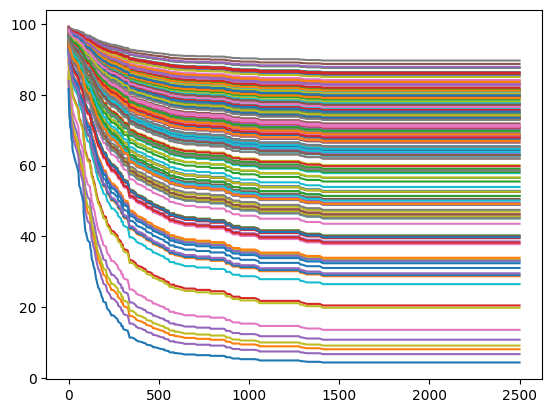

In [104]:
for i in surv_fn_gbm[26]:
    plt.plot(i.x, 100*i.y)

In [102]:
df_test_sets[df_test_sets.index.get_level_values(2) == 26][feature_cols + cat_cols]

,,,,song_station_spins_total_prior_8wk_max,mr_completed_count_prior_unv_prior_4wk_min,artist_station_spins_am_pm_dr_prior_26wk_std,med_completed_count_prior_unv_prior_26wk_min_pct_chg,artist_market_spins_non_on_prior_4wk_std,artist_format_ddl_prior_13wk_min_pct_chg,song_format_spins_am_pm_dr_prior_4wk_min,artist_format_ddl_prior_26wk_max_pct_chg,song_station_spins_total_prior_8wk_std,std_stream_count_prior_unv_prior_4wk_max,...,song_market_spins_total_prior_26wk_mean_pct_chg,mr_completed_count_prior_unv_prior_4wk_std,artist_station_spins_non_on_prior_4wk_min_pct_chg,max_completed_rate_prior_unv_prior_26wk_std,mean_thumbs_up_rate_prior_unv_prior_8wk_max,artist_format_ddl_prior_4wk_max_pct_chg,song_format_spins_total_prior_26wk_mean_pct_chg,artist_market_spins_non_on_prior_13wk_min_pct_chg,market_name,hit_spins_bucket
mediabase_id,call_letters,weeks_since_hit,hit_tag_year,,,,,,,,,,,,,,,,,,,,,
2672451,WFLZ-FM,26.0,2021,4.0,6.0,45.386291,0.000000,9.464847,0.000000,851.0,0.0,1.603567,230592.641721,...,-0.063492,0.000000,0.000000,0.000000e+00,0.237579,0.125000,-0.013182,0.000000,Tampa,"(750.0, 1000.0]"
2524291,WDCG-FM,26.0,2020,120.0,4788.0,10.846410,0.063877,9.831921,0.000000,2641.0,0.0,7.045769,704074.493759,...,-0.013706,967.244325,0.000000,1.312084e-01,0.860851,0.000000,-0.053989,0.000000,Raleigh,"(750.0, 1000.0]"
2638062,WHQC-FM,26.0,2021,5.0,6.0,13.542696,0.000000,4.031129,0.000000,206.0,0.0,2.000000,230592.641721,...,-0.042453,0.000000,0.000000,0.000000e+00,0.237579,0.166667,-0.030582,0.000000,Charlotte-Gastonia-Rock Hill,"(1500.0, 1750.0]"
2591406,KZZP-FM,26.0,2021,18.0,6.0,9.100549,0.000000,13.250786,-0.090909,813.0,0.0,1.552648,230592.641721,...,-0.024390,0.000000,0.384615,0.000000e+00,0.237579,-0.153846,-0.023655,0.000000,Phoenix,"(1250.0, 1500.0]"
2583267,WHTZ-FM,26.0,2020,50.0,462.0,20.520759,0.028367,35.805028,0.000000,1952.0,0.0,14.860662,282671.062136,...,-0.014077,27.928480,0.000000,1.189887e-01,0.760461,0.000000,-0.042924,0.000000,New York,"(500.0, 750.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553815,KYLD-FM,26.0,2020,4.0,101610.0,8.107072,0.020748,1.414214,0.000000,496.0,0.0,1.457738,81691.746511,...,-0.292365,3286.520196,0.000000,0.000000e+00,0.898947,0.000000,-0.161372,0.000000,San Francisco,"(1250.0, 1500.0]"
2430725,KDWB-FM,26.0,2020,1.0,254752.0,12.946577,0.000000,1.914854,0.000000,461.0,0.0,0.353553,802550.517267,...,-0.087393,61808.576742,0.000000,1.054605e-08,0.850260,0.000000,-0.007994,0.000000,Minneapolis,"(500.0, 750.0]"
2597601,WIHT-FM,26.0,2021,6.0,6.0,24.994923,0.000000,6.480741,0.000000,1412.0,0.0,1.581139,230592.641721,...,-0.041840,0.000000,0.000000,0.000000e+00,0.237579,0.000000,-0.080877,0.000000,"Washington, DC","(1000.0, 1250.0]"


Text(0.5, 0.98, 'Predicted survival curves by week for Die For You (THE WEEKND) at KIIS-FM')

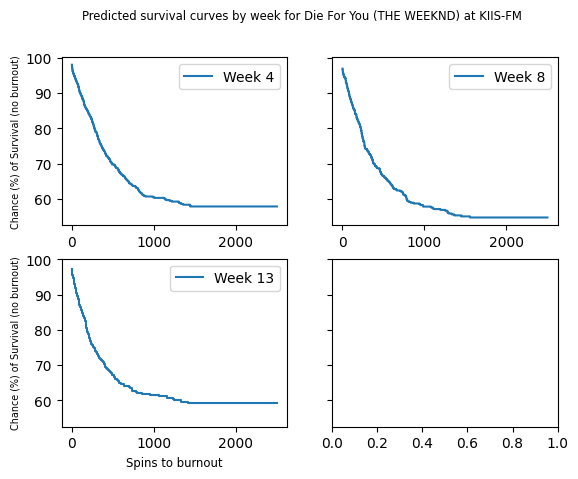

In [97]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharey=True)
ax1.step(surv_fn_gbm[18][0].x, 100*surv_fn_gbm[18][0].y , label='Week 4')
ax2.step(surv_fn_gbm[19][0].x, 100*surv_fn_gbm[19][0].y , label='Week 8')
ax3.step(surv_fn_gbm[20][0].x, 100*surv_fn_gbm[20][0].y , label='Week 13')
# ax4.step(surv_fn_gbm[26][0].x, 100*surv_fn_gbm[26][0].y , label='Week 26')
ax1.legend()
ax2.legend()
ax3.legend()
# ax4.legend()
ax1.set_ylabel('Chance (%) of Survival (no burnout)', fontsize='x-small')
ax3.set_ylabel('Chance (%) of Survival (no burnout)', fontsize='x-small')
ax3.set_xlabel('Spins to burnout', fontsize='small')
# ax4.set_xlabel('Spins to burnout', fontsize='small')

plt.suptitle('Predicted survival curves by week for Die For You (THE WEEKND) at KIIS-FM', fontsize='small')
# plt.savefig('pred_surv_curves.jpeg', format='jpeg', dpi=300)

#### Error Analysis

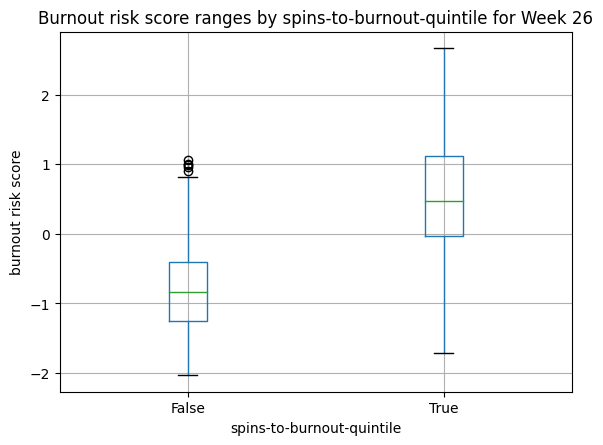

In [58]:
risk_scores_gbm_train[risk_scores_gbm_train['week'] == 8].boxplot(['predicted_risk_score'], by=['censoring_flg'])
plt.ylabel('burnout risk score')
plt.xlabel('spins-to-burnout-quintile')
plt.title('Burnout risk score ranges by spins-to-burnout-quintile for Week 26')
fig = plt.gcf()
fig.suptitle('')
plt.savefig('burn_risk_score.jpeg', format='jpeg', dpi=300)

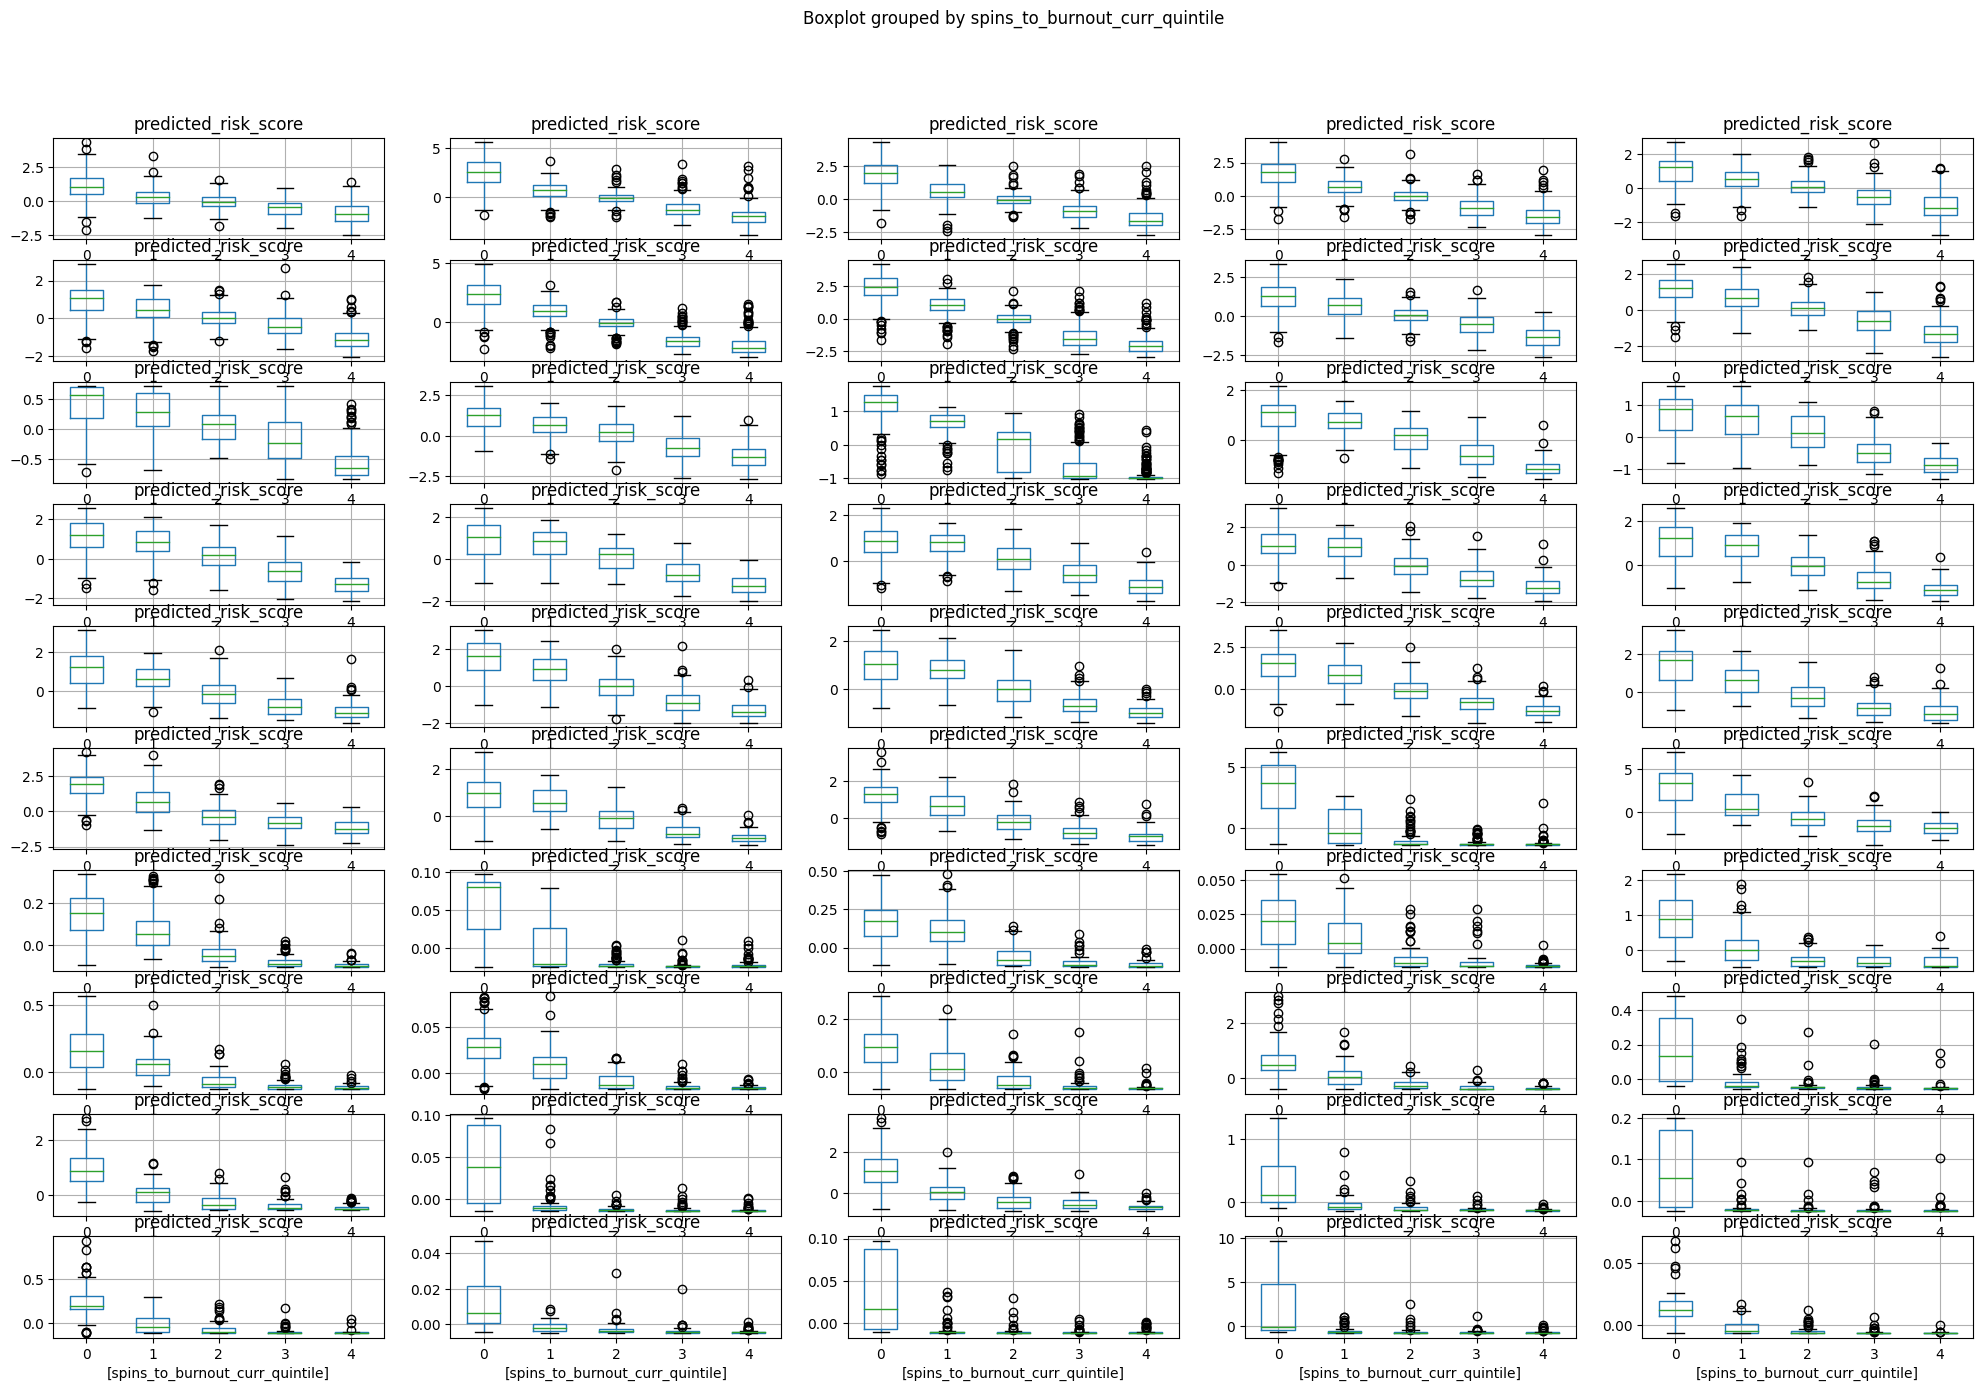

In [67]:
import matplotlib.pyplot as plt

grid = plt.GridSpec(nrows=10, ncols=5)
row_col_tuples = [(i, j) for i in range(10) for j in range(5)]
idx_count = 0
fig=plt.figure(figsize=(24, 16))
for wk in weeks_range:
    ax = fig.add_subplot(grid[row_col_tuples[idx_count][0], row_col_tuples[idx_count][1]])
    risk_scores_gbm_train[risk_scores_gbm_train['week'] == wk].boxplot(['predicted_risk_score'], by=['spins_to_burnout_curr_quintile'], ax=ax)
    # plt.ylabel('burnout risk score')
    # plt.xlabel('spins-to-burnout-quintile')
    # plt.title('Burnout risk score ranges by spins-to-burnout-quintile for Week ' + str(wk))
    idx_count=idx_count + 1

In [82]:
mask_inves = (risk_scores_gbm_train['week'] == 26) & (risk_scores_gbm_train['spins_to_burnout_curr'] == 0) & (risk_scores_gbm_train['predicted_risk_score'] < 0)
df_risk_score_inves = risk_scores_gbm_train.loc[mask_inves]

In [91]:
sel_idx = pd.MultiIndex.from_arrays([df_risk_score_inves.index.get_level_values(0), df_risk_score_inves.index.get_level_values(1)])

In [99]:
sel_idx[0]

(2687270, 'KZZP-FM')

In [100]:
df_sample_features_inves = df_features.set_index(['mediabase_id', 'call_letters']).loc[sel_idx[1]]

In [133]:
df_sample_features_inves

song_id market_name  artist_id format_code  \
mediabase_id call_letters                                                 
2516158      WKSC-FM       900032522     Chicago  739017791          H1   
             WKSC-FM       900032522     Chicago  739017791          H1   
             WKSC-FM       900032522     Chicago  739017791          H1   
             WKSC-FM       900032522     Chicago  739017791          H1   
             WKSC-FM       900032522     Chicago  739017791          H1   
...                              ...         ...        ...         ...   
             WKSC-FM       900032522     Chicago  739017791          H1   
             WKSC-FM       900032522     Chicago  739017791          H1   
             WKSC-FM       900032522     Chicago  739017791          H1   
             WKSC-FM       900032522     Chicago  739017791          H1   
             WKSC-FM       900032522     Chicago  739017791          H1   

                          song_release_date first_callout_date  \
mediabase_id call_letters                                        
2516158      WKSC-FM             2019-07-01         2020-03-09   
             WKSC-FM             2019-07-01         2020-03-09   
             WKSC-FM             2019-07-01         2020-03-09   
             WKSC-FM             2019-07-01         2020-03-09   
             WKSC-FM             2019-07-01         2020-03-09   
...                                     ...                ...   
             WKSC-FM             2019-07-01         2020-03-09   
             WKSC-FM             2019-07-01         2020-03-09   
             WKSC-FM             2019-07-01         2020-03-09   
             WKSC-FM             2019-07-01         2020-03-09   
             WKSC-FM             2019-07-01         2020-03-09   

                          last_callout_date first_spin_date last_spin_date  \
mediabase_id call_letters                                                    
2516158      WKSC-FM             2023-02-20      2019-11-24     2023-02-12   
             WKSC-FM             2023-02-20      2019-11-24     2023-02-12   
             WKSC-FM             2023-02-20      2019-11-24     2023-02-12   
             WKSC-FM             2023-02-20      2019-11-24     2023-02-12   
             WKSC-FM             2023-02-20      2019-11-24     2023-02-12   
...                                     ...             ...            ...   
             WKSC-FM             2023-02-20      2019-11-24     2023-02-12   
             WKSC-FM             2023-02-20      2019-11-24     2023-02-12   
             WKSC-FM             2023-02-20      2019-11-24     2023-02-12   
             WKSC-FM             2023-02-20      2019-11-24     2023-02-12   
             WKSC-FM             2023-02-20      2019-11-24     2023-02-12   

                          hit_tag_date  ... market_spins_propn_ftq_to_hit_std  \
mediabase_id call_letters               ...                                     
2516158      WKSC-FM        2020-09-13  ...                               NaN   
             WKSC-FM        2020-09-13  ...                               NaN   
             WKSC-FM        2020-09-13  ...                               NaN   
             WKSC-FM        2020-09-13  ...                               NaN   
             WKSC-FM        2020-09-13  ...                               NaN   
...                                ...  ...                               ...   
             WKSC-FM        2020-09-13  ...                               NaN   
             WKSC-FM        2020-09-13  ...                               NaN   
             WKSC-FM        2020-09-13  ...                               NaN   
             WKSC-FM        2020-09-13  ...                               NaN   
             WKSC-FM        2020-09-13  ...                               NaN   

                           artist_spins_propn_ftq_to_hit_min  \
mediabase_id call_letters                                    

In [109]:
inves_cols = [col for col in df_sample_features_inves.columns if 'ddl' in col and 'wk' in col and 'max' in col]

In [110]:
inves_cols

['song_station_ddl_prior_1wk_max',
 'song_format_ddl_prior_1wk_max',
 'artist_format_ddl_prior_1wk_max',
 'song_station_ddl_prior_4wk_max',
 'song_format_ddl_prior_4wk_max',
 'artist_format_ddl_prior_4wk_max',
 'song_station_ddl_prior_8wk_max',
 'song_format_ddl_prior_8wk_max',
 'artist_format_ddl_prior_8wk_max',
 'song_station_ddl_prior_13wk_max',
 'song_format_ddl_prior_13wk_max',
 'artist_format_ddl_prior_13wk_max',
 'song_station_ddl_prior_26wk_max',
 'song_format_ddl_prior_26wk_max',
 'artist_format_ddl_prior_26wk_max']

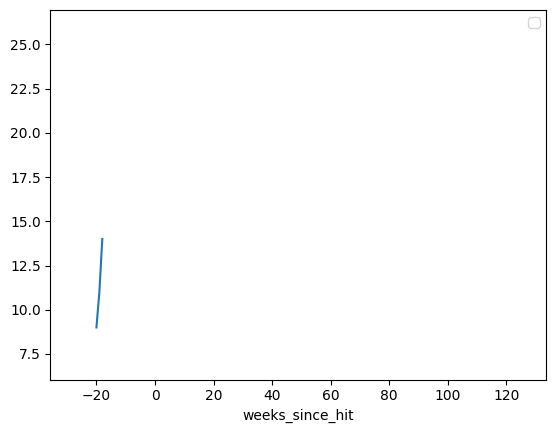

In [132]:
inves_cols=['song_station_ddl']
df_sample_features_inves[inves_cols + ['weeks_since_hit']].plot(x='weeks_since_hit')
plt.legend('')

<AxesSubplot:xlabel='weeks_since_hit', ylabel='song_station_ddl'>

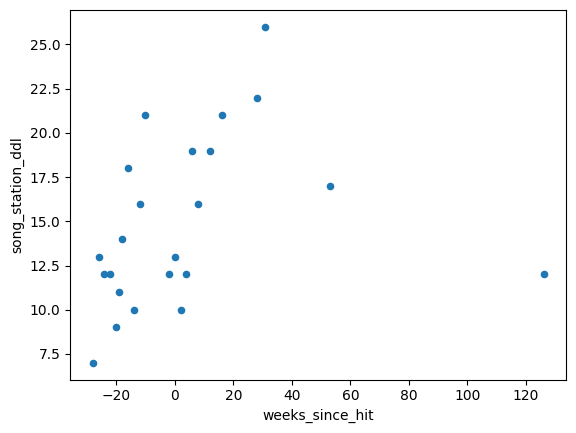

In [139]:
df_sample_features_inves[['weeks_since_hit', 'song_station_ddl']].plot(kind='scatter', x='weeks_since_hit', y='song_station_ddl')

<AxesSubplot:xlabel='weeks_since_hit', ylabel='song_station_ddl_prior_4wk_mean'>

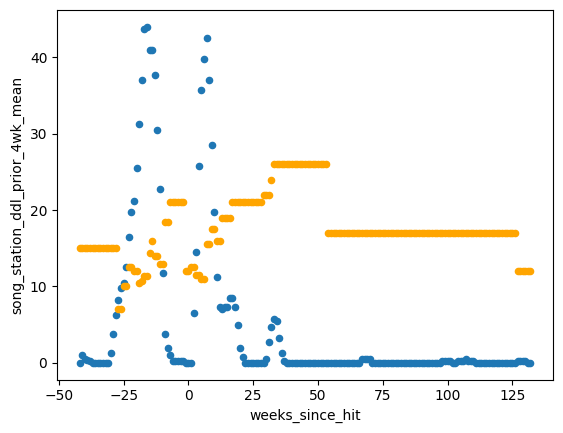

In [156]:
ax=plt.gca()
df_sample_features_inves[['weeks_since_hit', 'song_station_spins_non_on_prior_4wk_mean']].plot(kind='scatter', x='weeks_since_hit', y='song_station_spins_non_on_prior_4wk_mean', ax=ax)
df_sample_features_inves[['weeks_since_hit', 'song_station_ddl_prior_4wk_mean']].plot(kind='scatter', x='weeks_since_hit', y='song_station_ddl_prior_4wk_mean', ax=ax, c='orange')
# df_sample_features_inves[['weeks_since_hit', 'song_station_pop_prior_4wk_mean']].plot(kind='scatter', x='weeks_since_hit', y='song_station_pop_prior_4wk_mean', ax=ax, c='red')

In [121]:
df_sample_features_inves['weeks_since_hit'].values

array([-42., -41., -40., -39., -38., -37., -36., -35., -34., -33., -32.,
       -31., -30., -29., -28., -27., -26., -25., -24., -23., -22., -21.,
       -20., -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,
        -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
         2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,
        46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,
        57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,
        68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,
        79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.,
       101., 102., 103., 104., 105., 106., 107., 10

#### breakdown by A/B/C classification